In [1]:
import pandas as pd
import numpy as np

#### DATA

In [2]:
titere = pd.read_csv('data/alferdez_tweets.csv', delimiter=',', header=None)
ladrona = pd.read_csv('data/CFKArgentina_tweets.csv', delimiter=',', header=None)
gato = pd.read_csv('data/mauriciomacri_tweets.csv', delimiter=',', header=None)
heidi = pd.read_csv('data/mariuvidal_tweets.csv', delimiter=',', header=None)
mistica = pd.read_csv('data/elisacarrio_tweets.csv', delimiter=',', header=None)
ventajita = pd.read_csv('data/SergioMassa_tweets.csv', delimiter=',', header=None)
larrata = pd.read_csv('data/horaciorlarreta_tweets.csv', delimiter=',', header=None)

In [3]:
titere.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
ladrona.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
gato.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
heidi.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
mistica.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
ventajita.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
larrata.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']

In [4]:
data = [titere, ladrona, gato, heidi, mistica, ventajita, larrata]
pol = ['Fernandez','Fernandez de Kirchner','Macri','Vidal','Carrió','Massa','Larreta']

Distinguish replies from threads

In [5]:
for df in data:
    df['thread'] = df.user_id.astype('float') == df.reply
    df.loc[df.user_id.astype('float') == df.reply, 'reply'] = False
    df.reply.fillna(False, inplace=True)    

#### EDA

Retweets and Favs

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

In [54]:
pd.to_datetime(df.loc[df.date.str.contains('2020'), 'date']).dt.month

1056    12
1057    12
1058    12
1059    12
1060    12
        ..
3110     1
3111     1
3112     1
3113     1
3114     1
Name: date, Length: 2059, dtype: int64

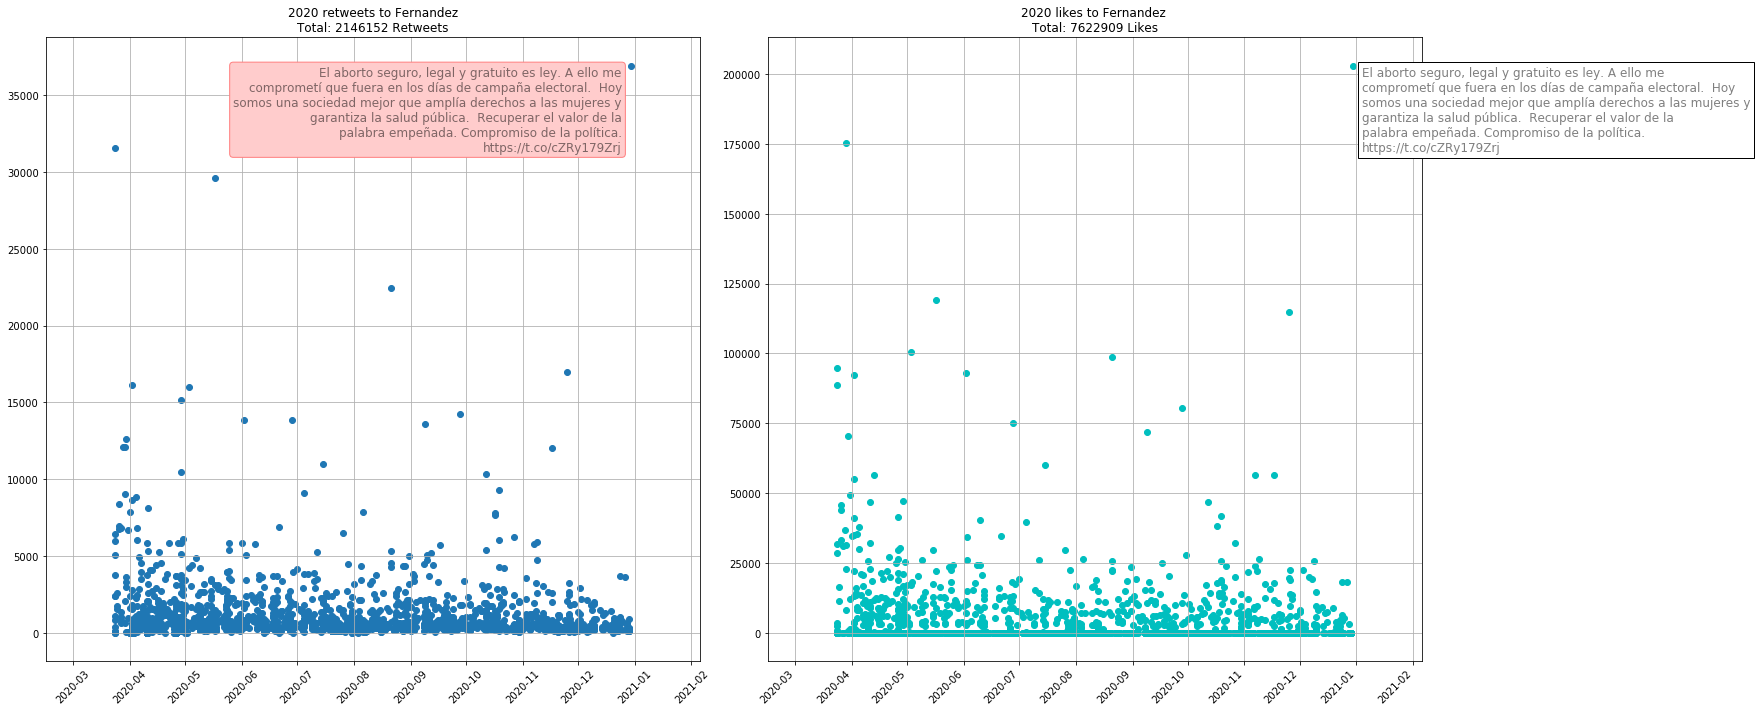

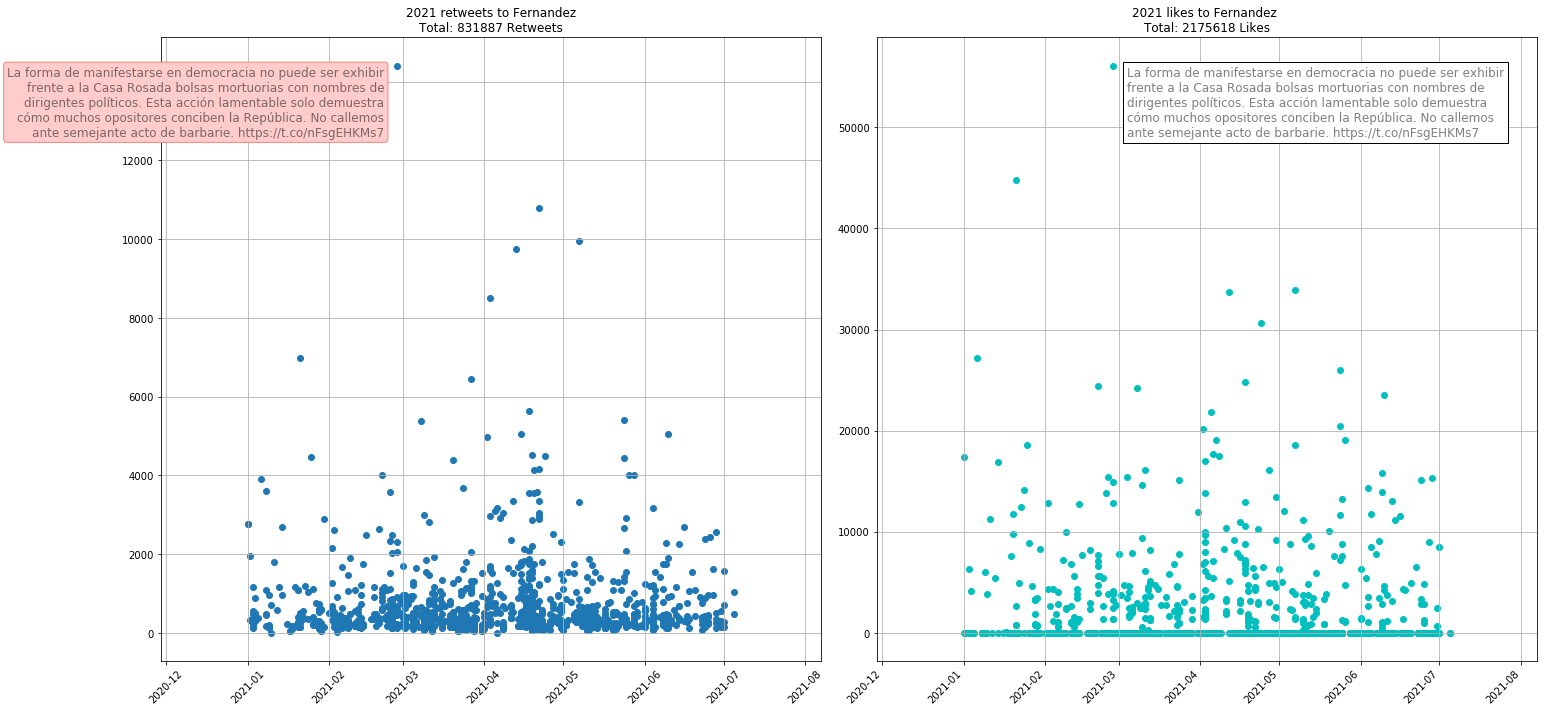

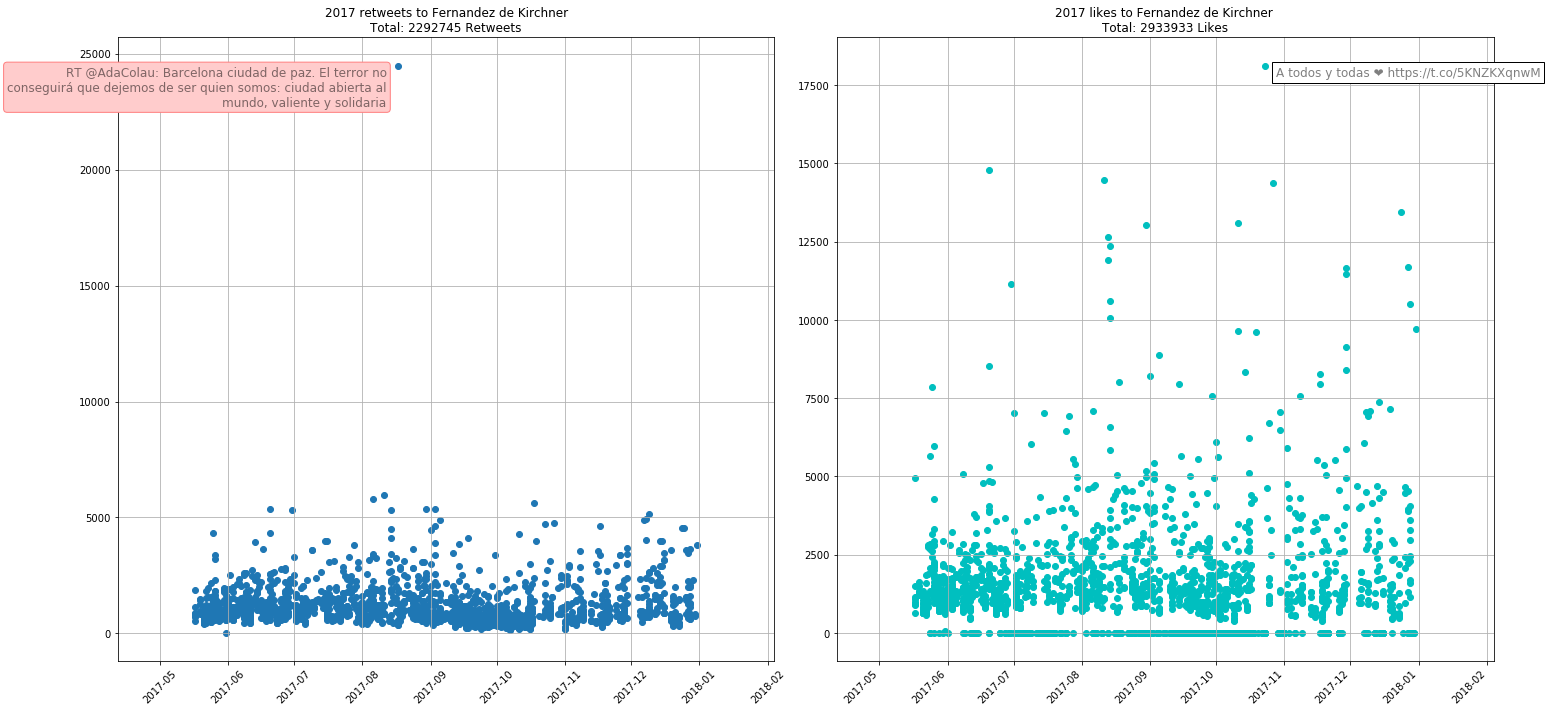

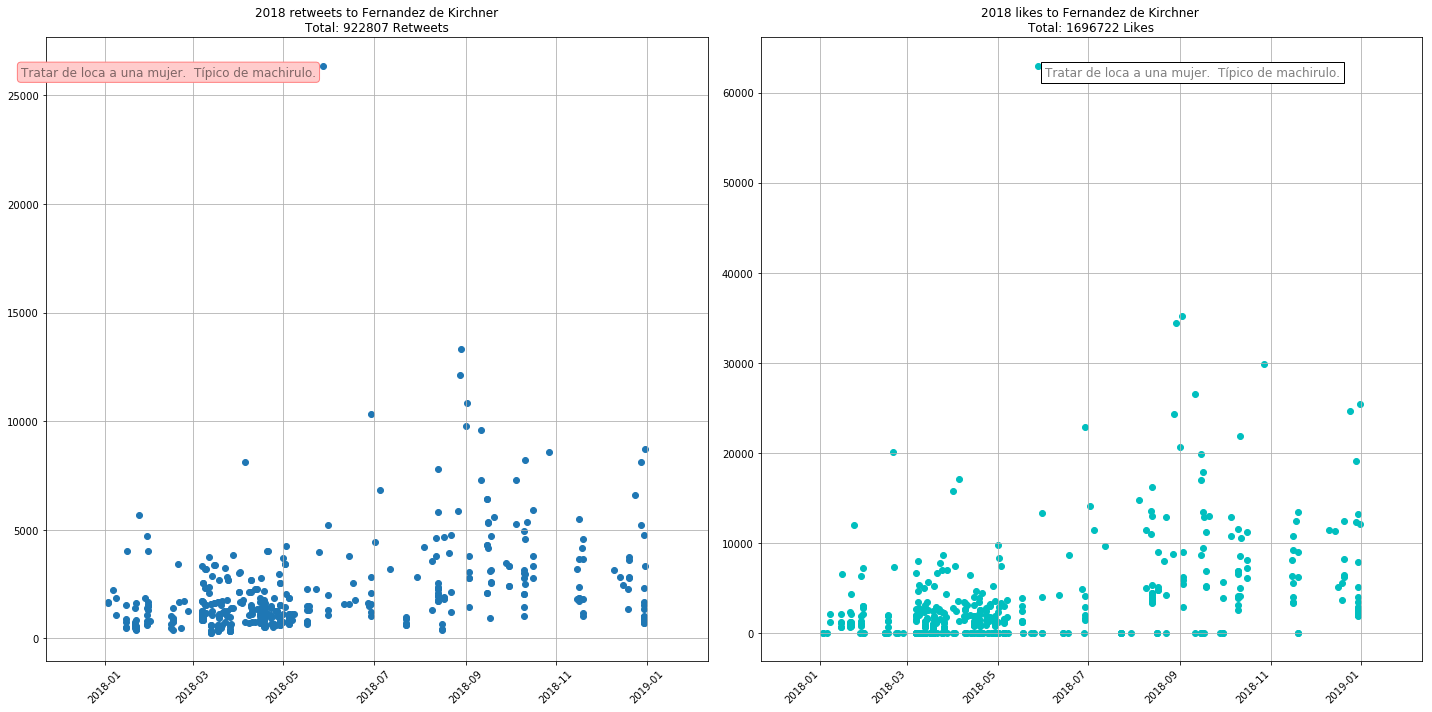

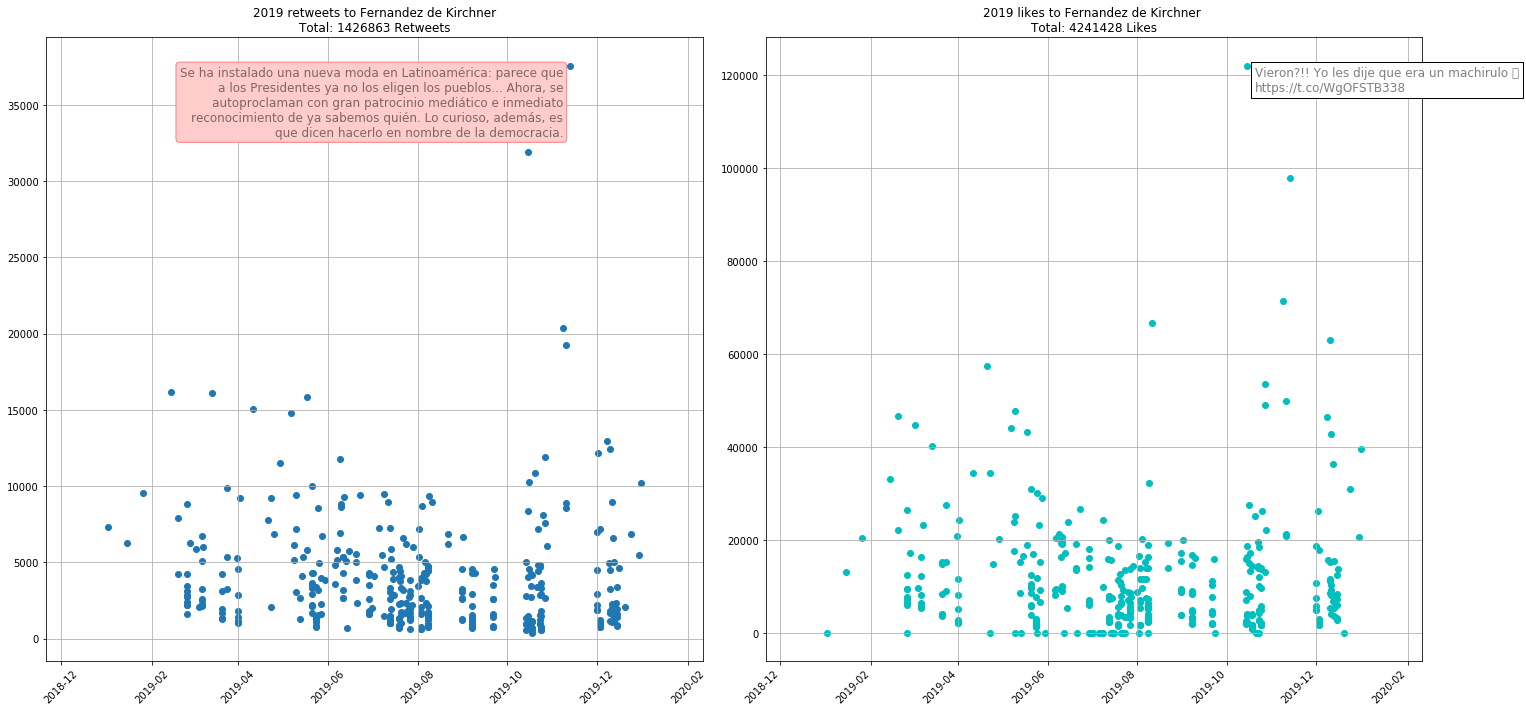

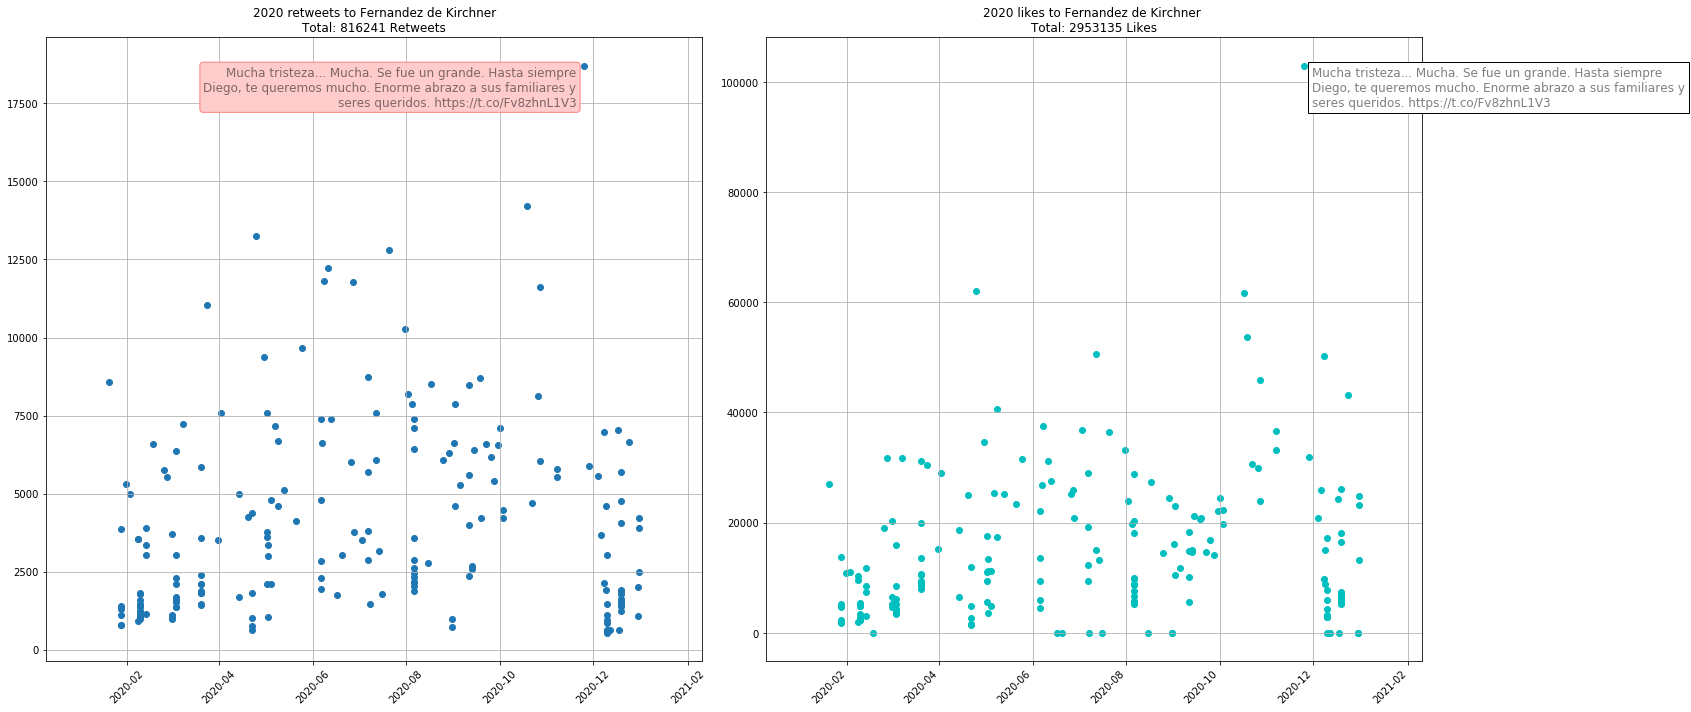

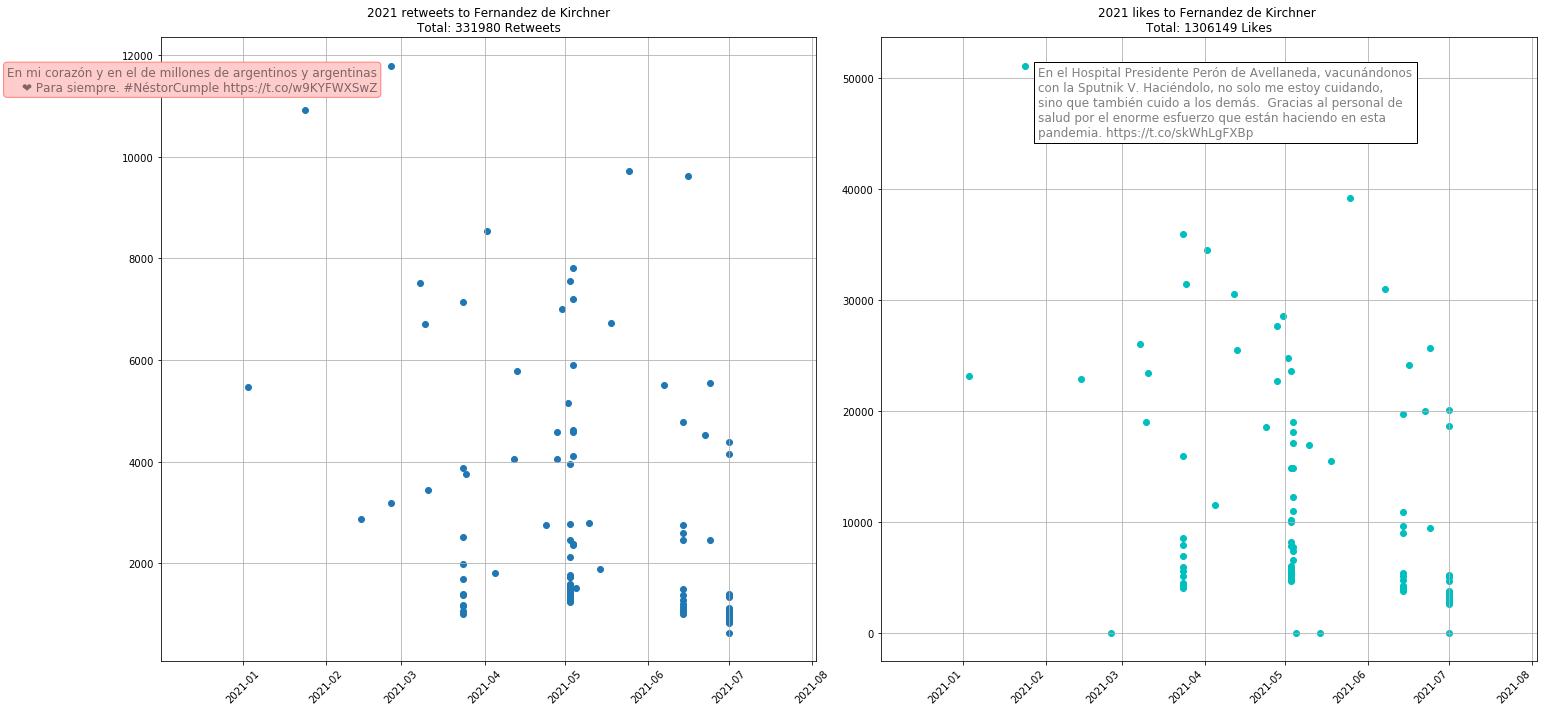

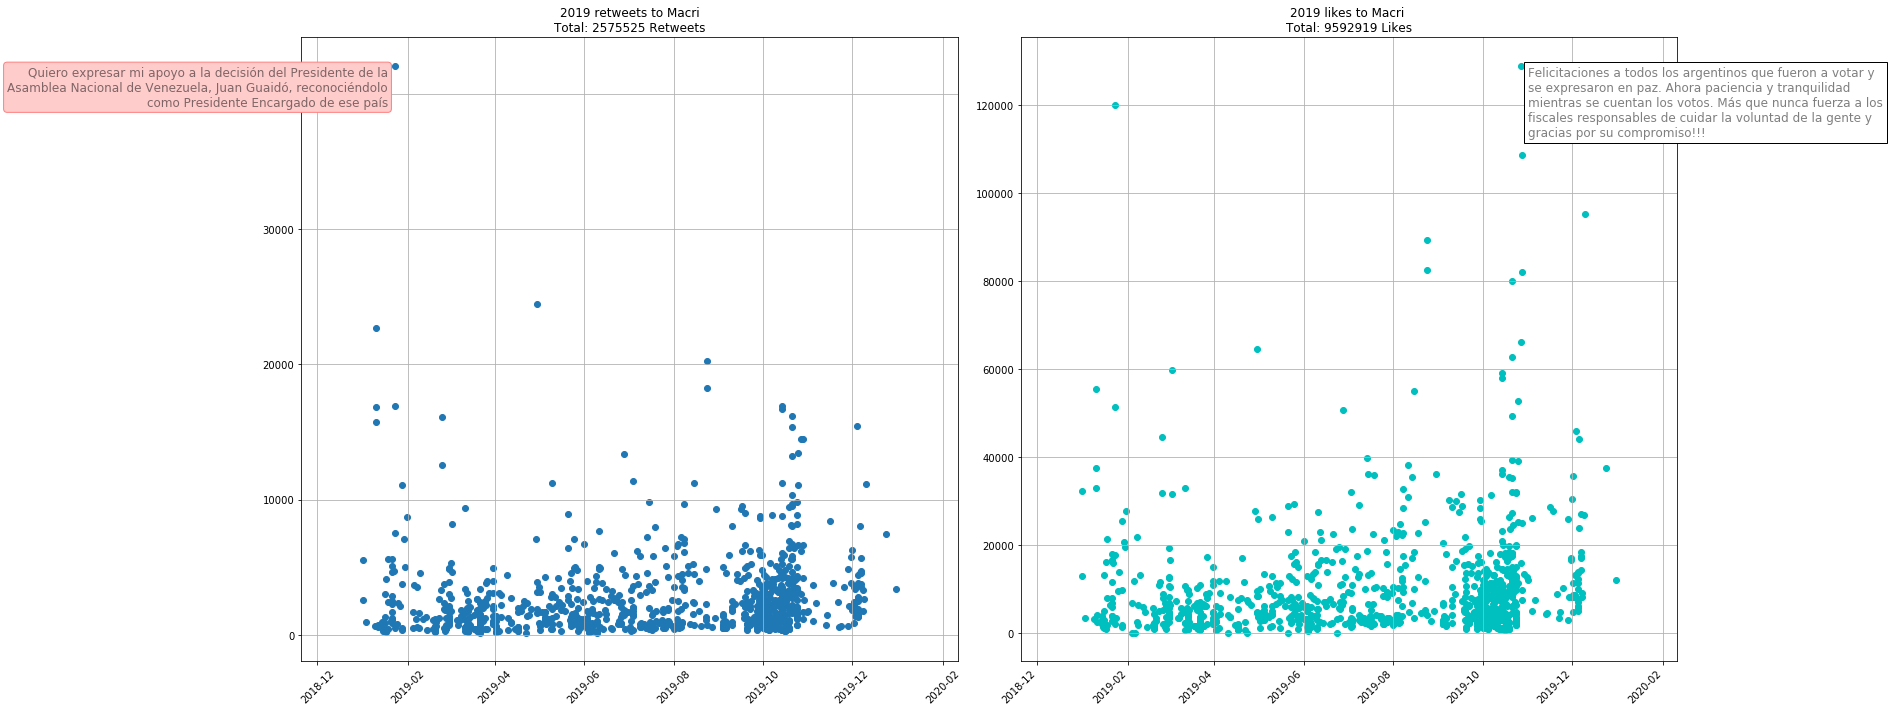

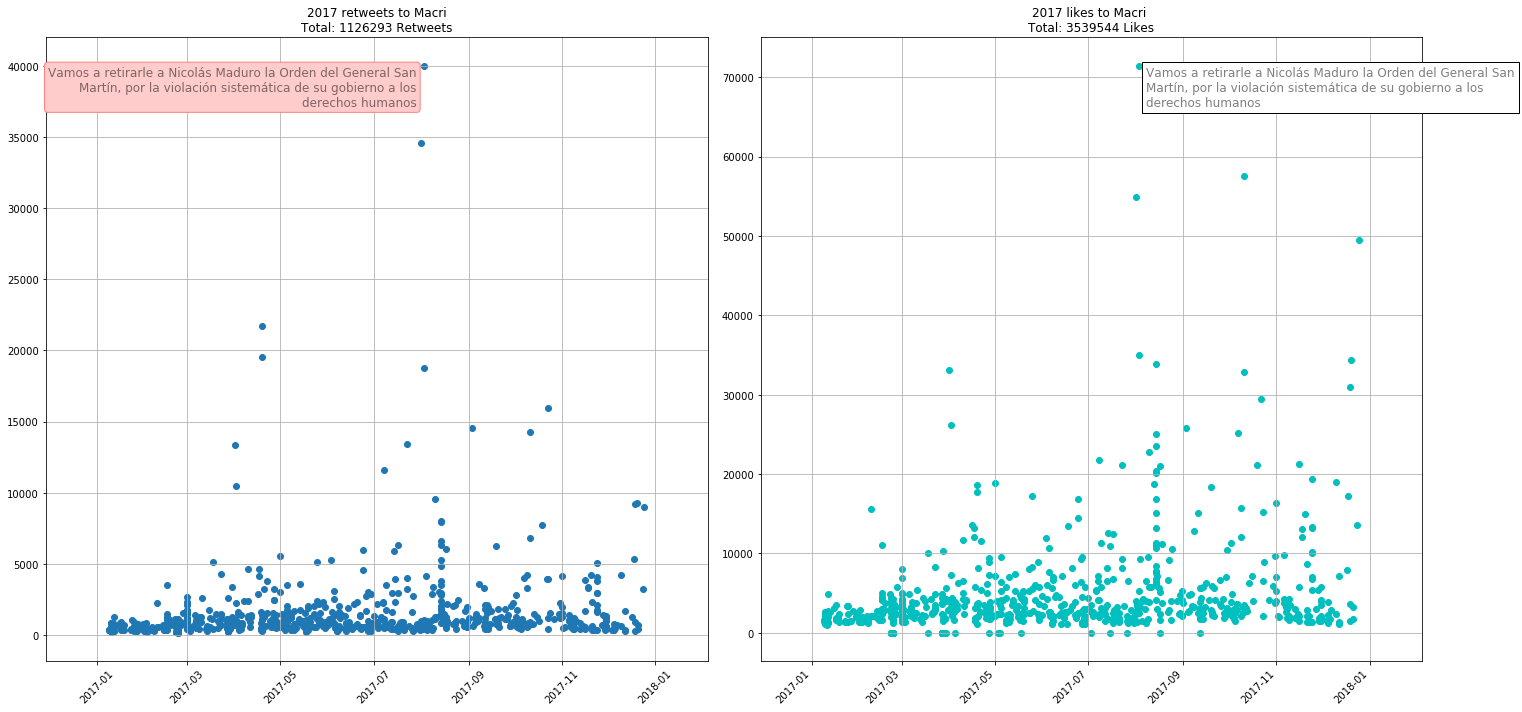

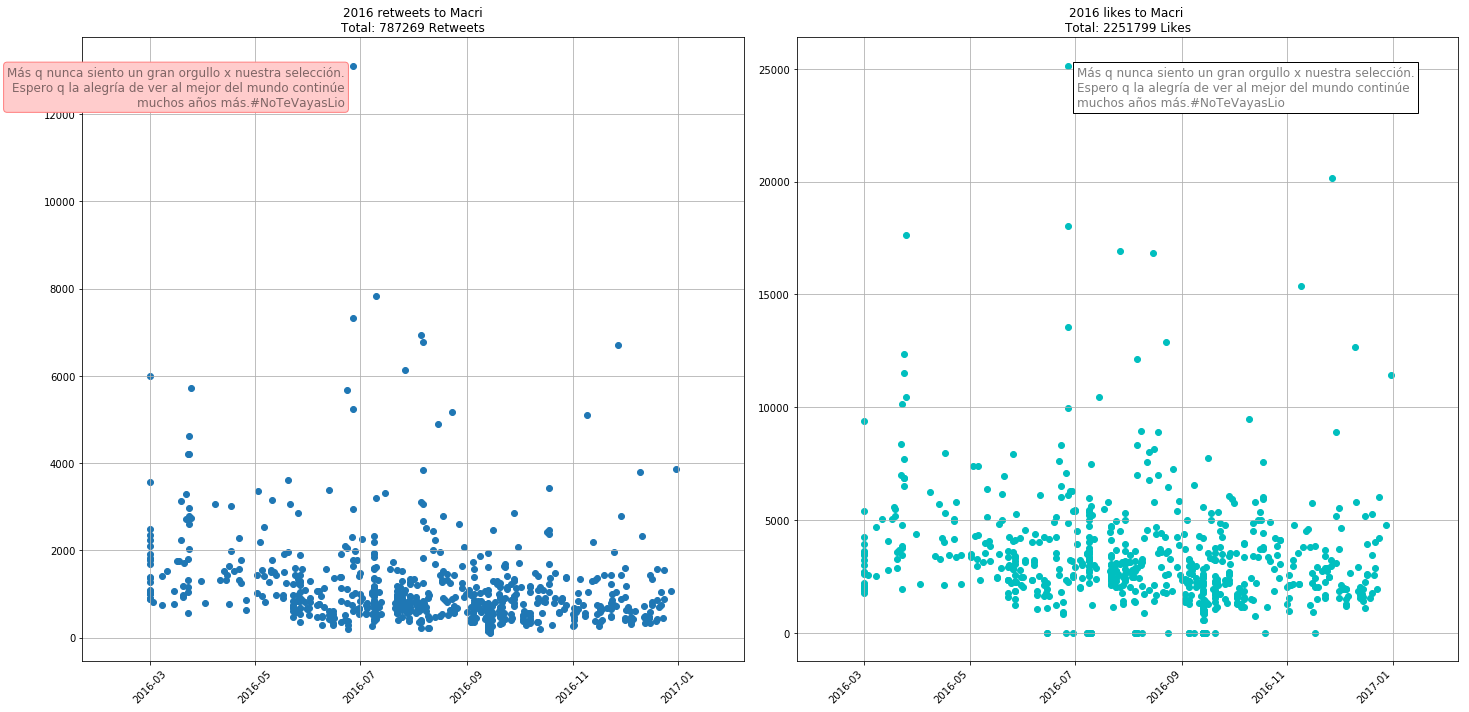

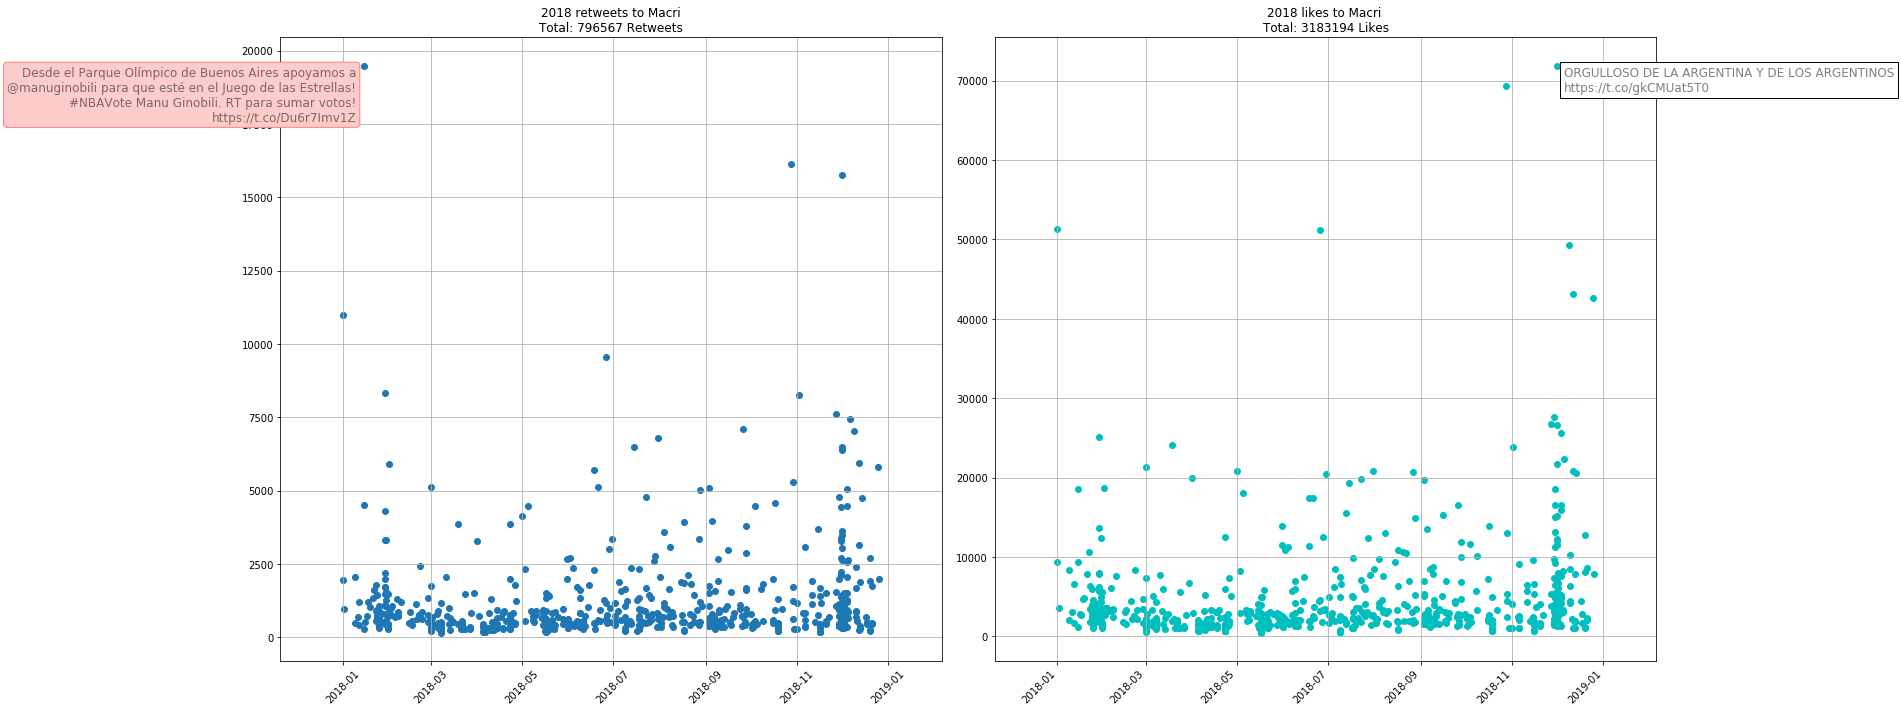

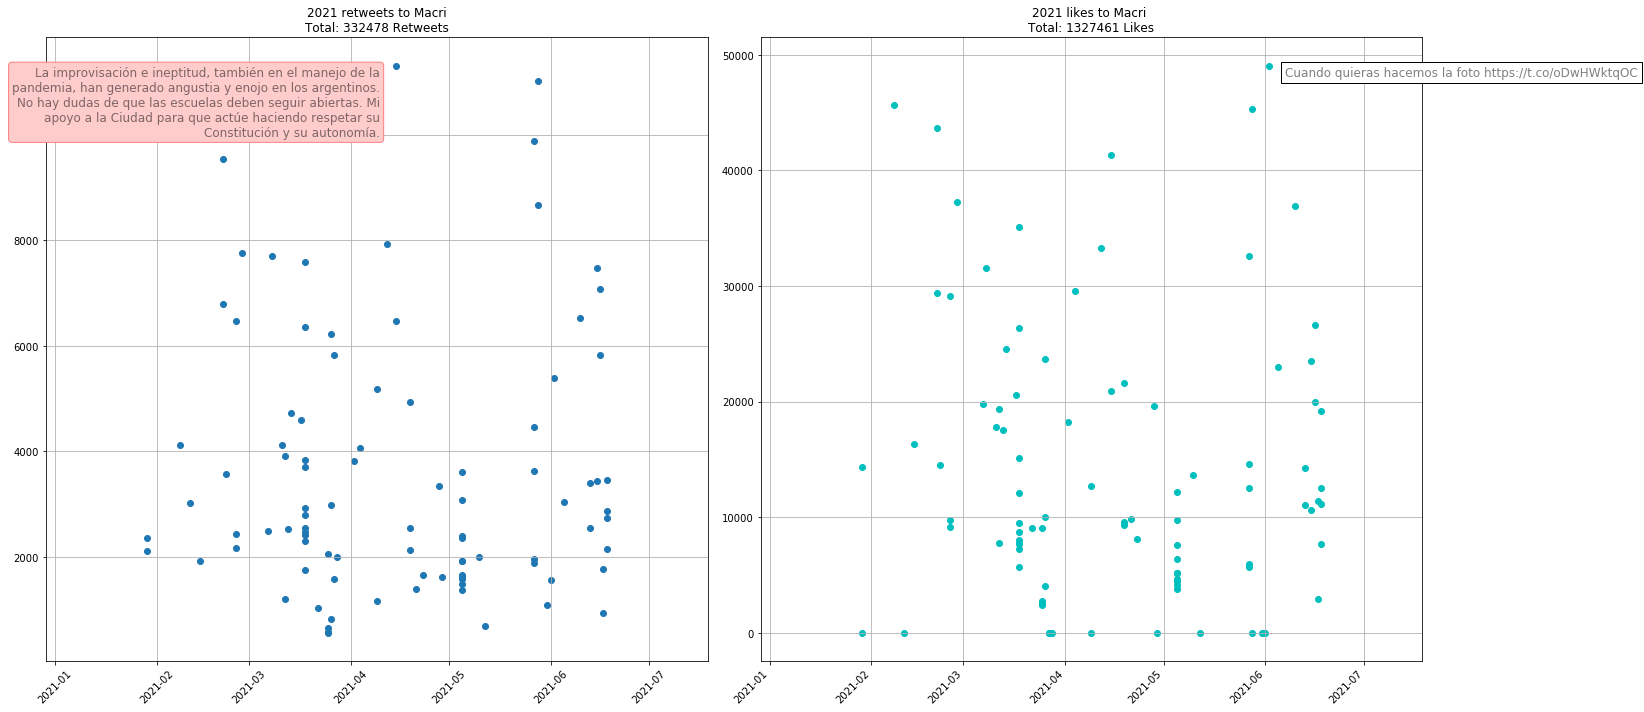

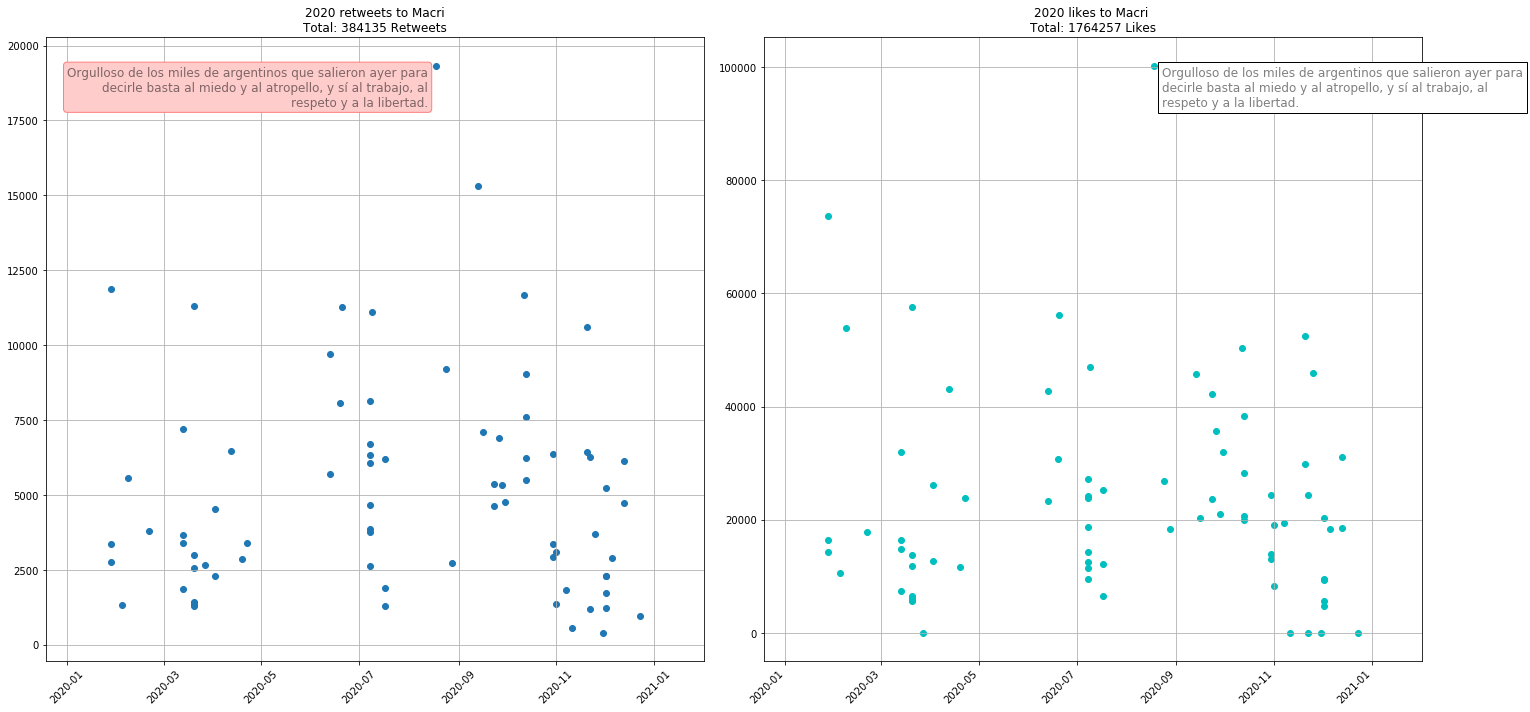

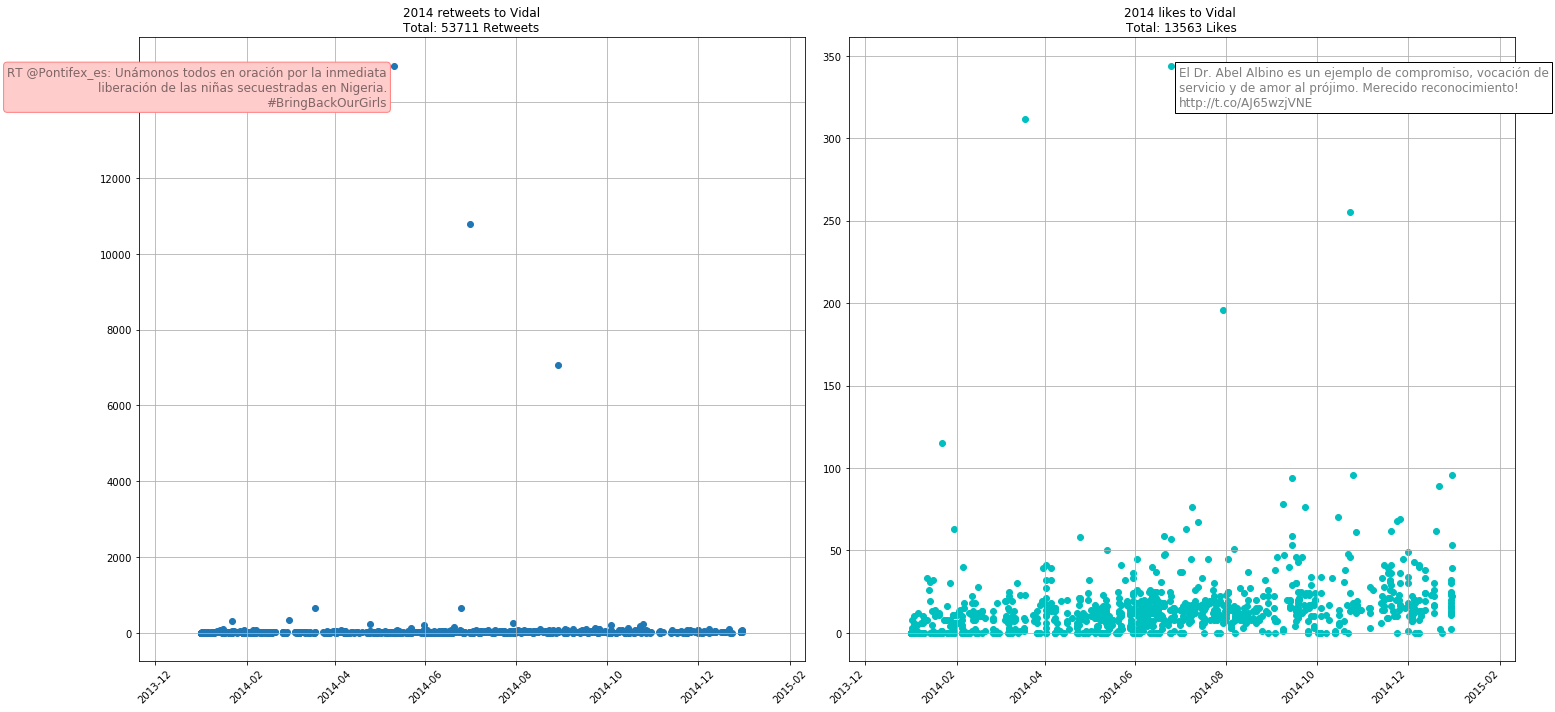

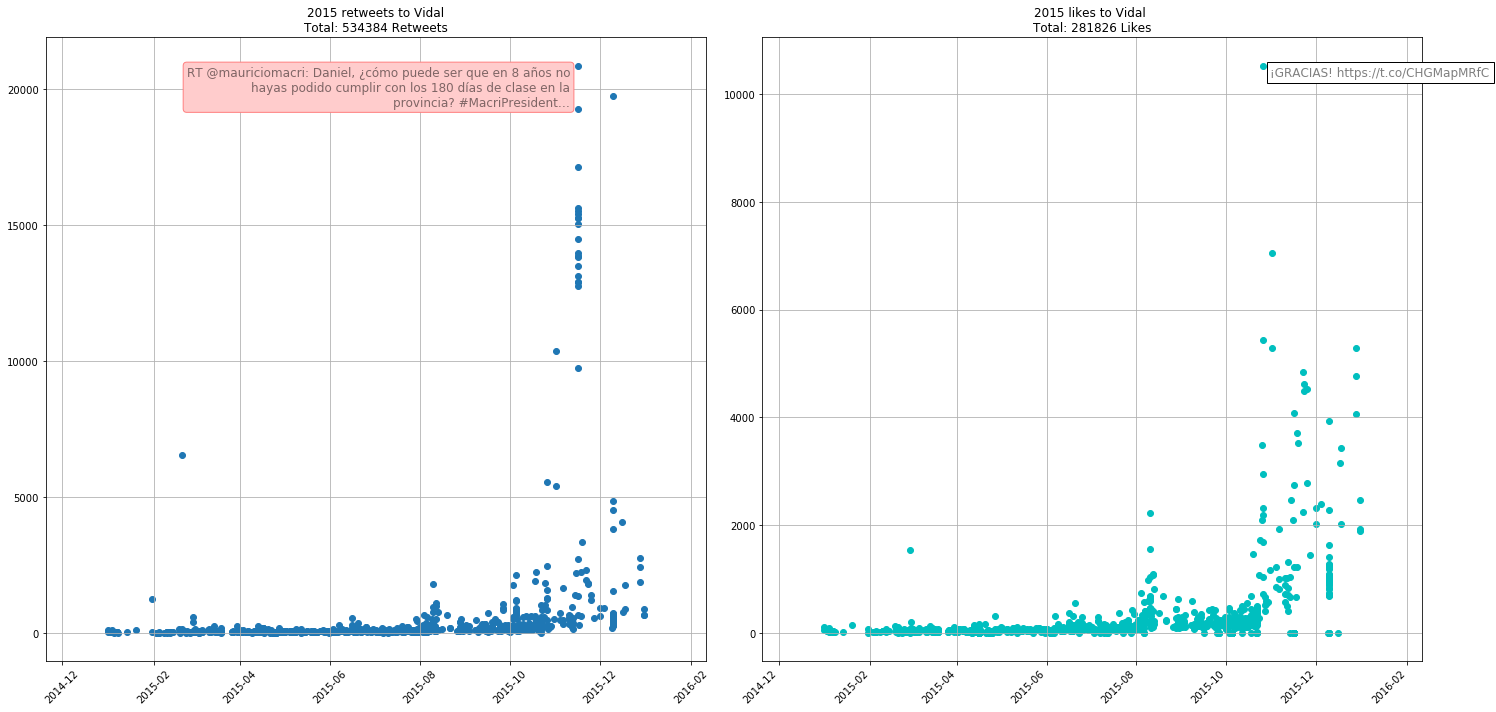

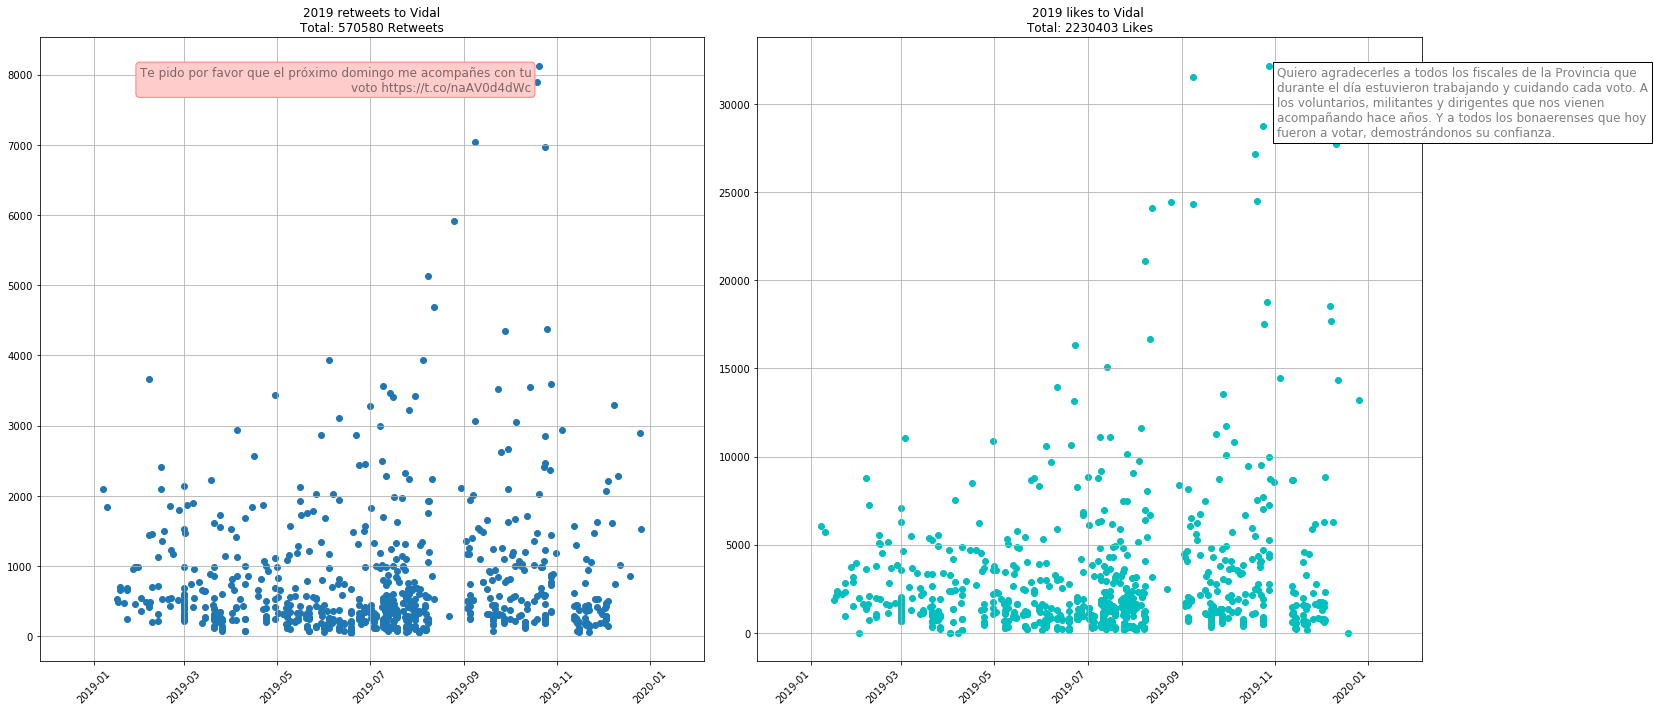

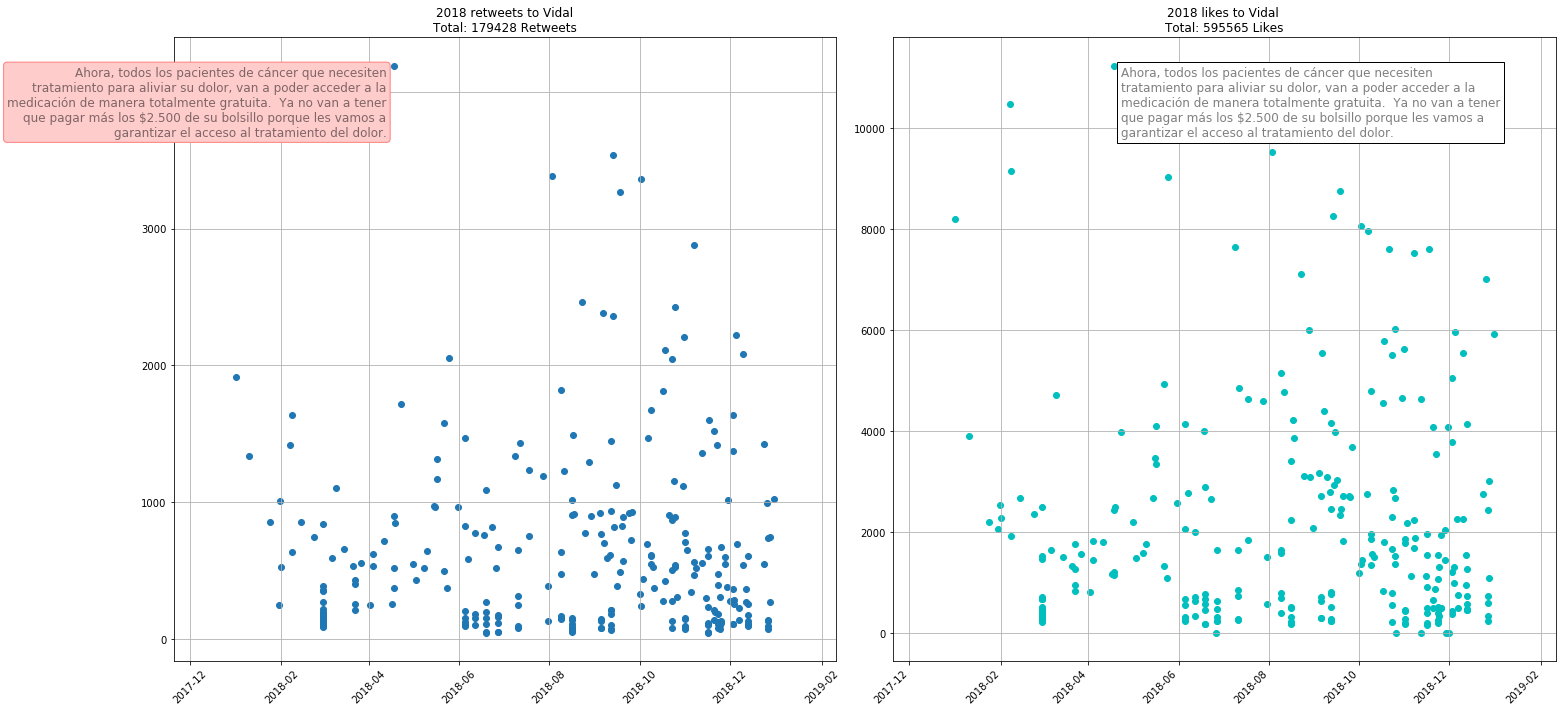

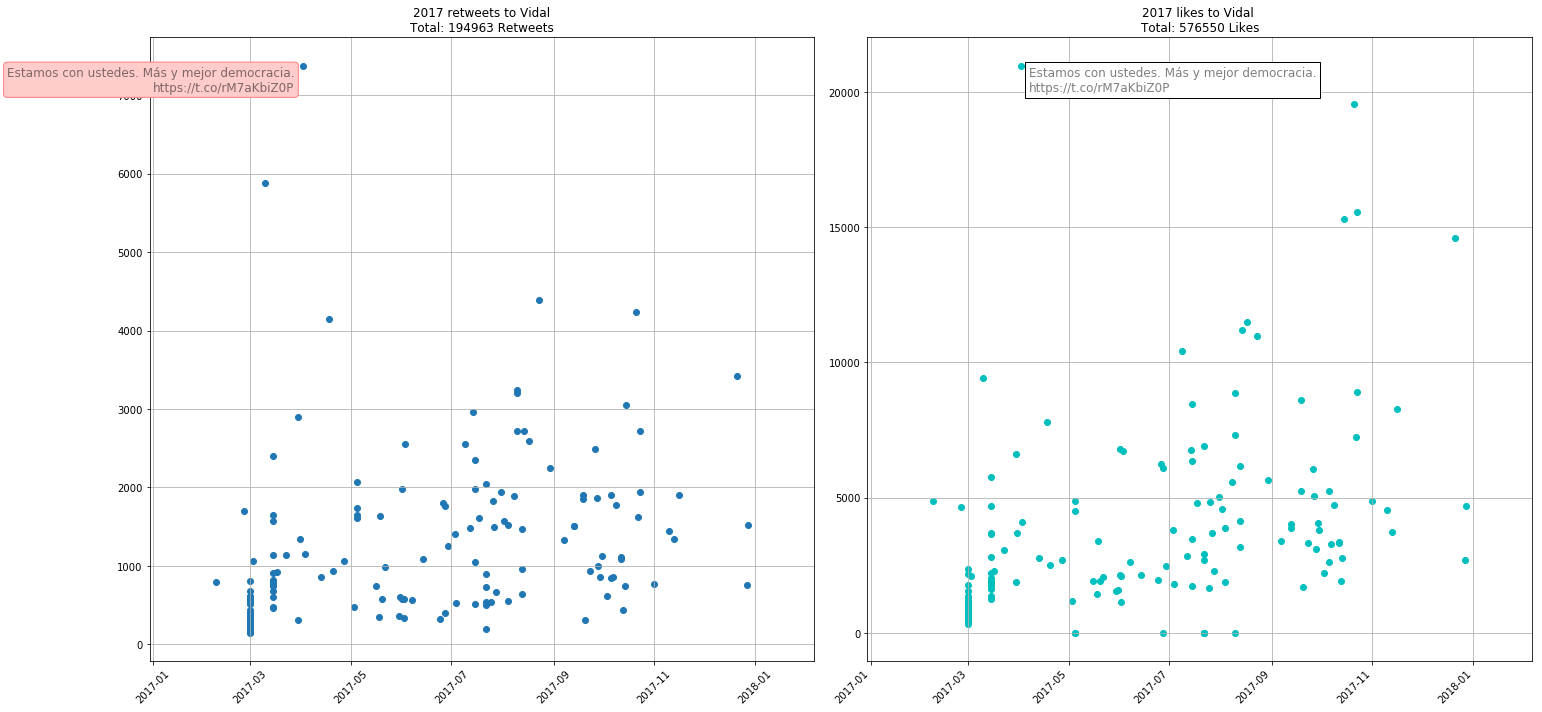

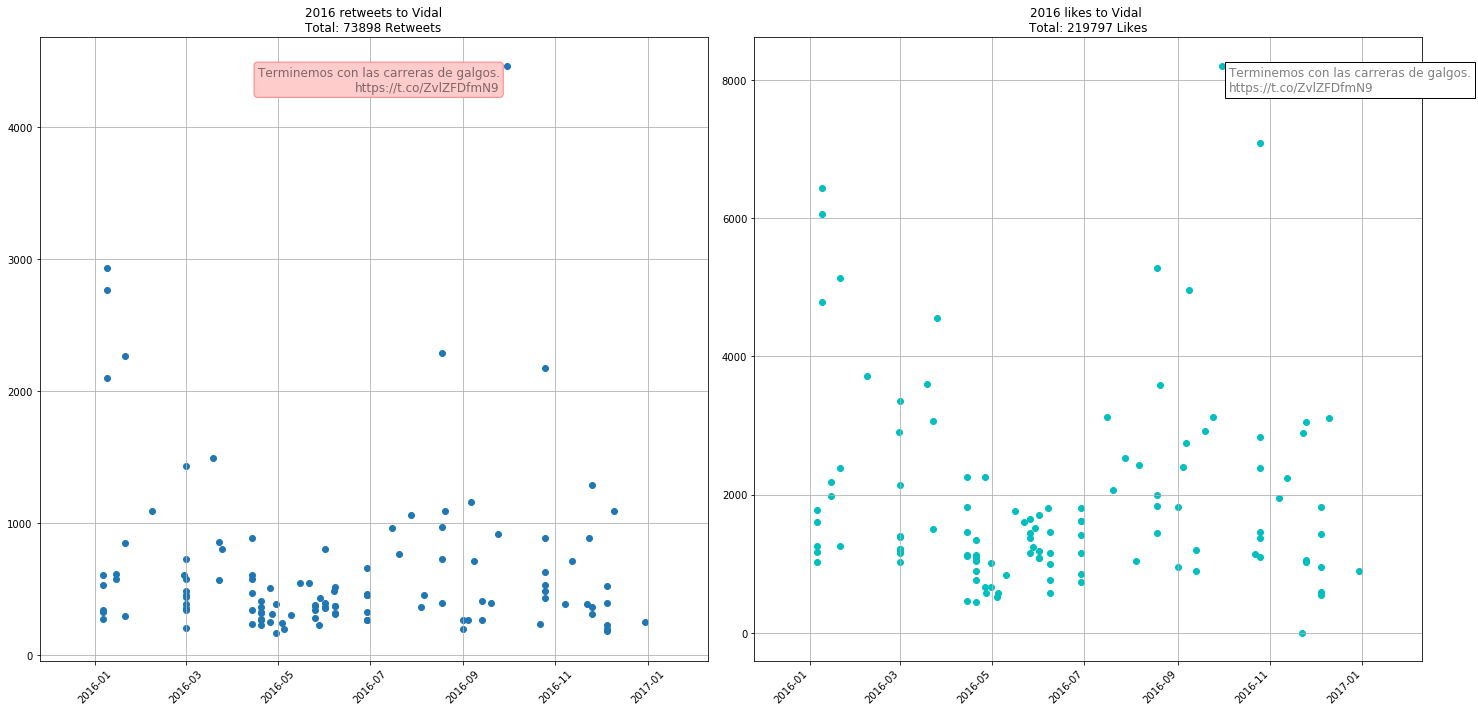

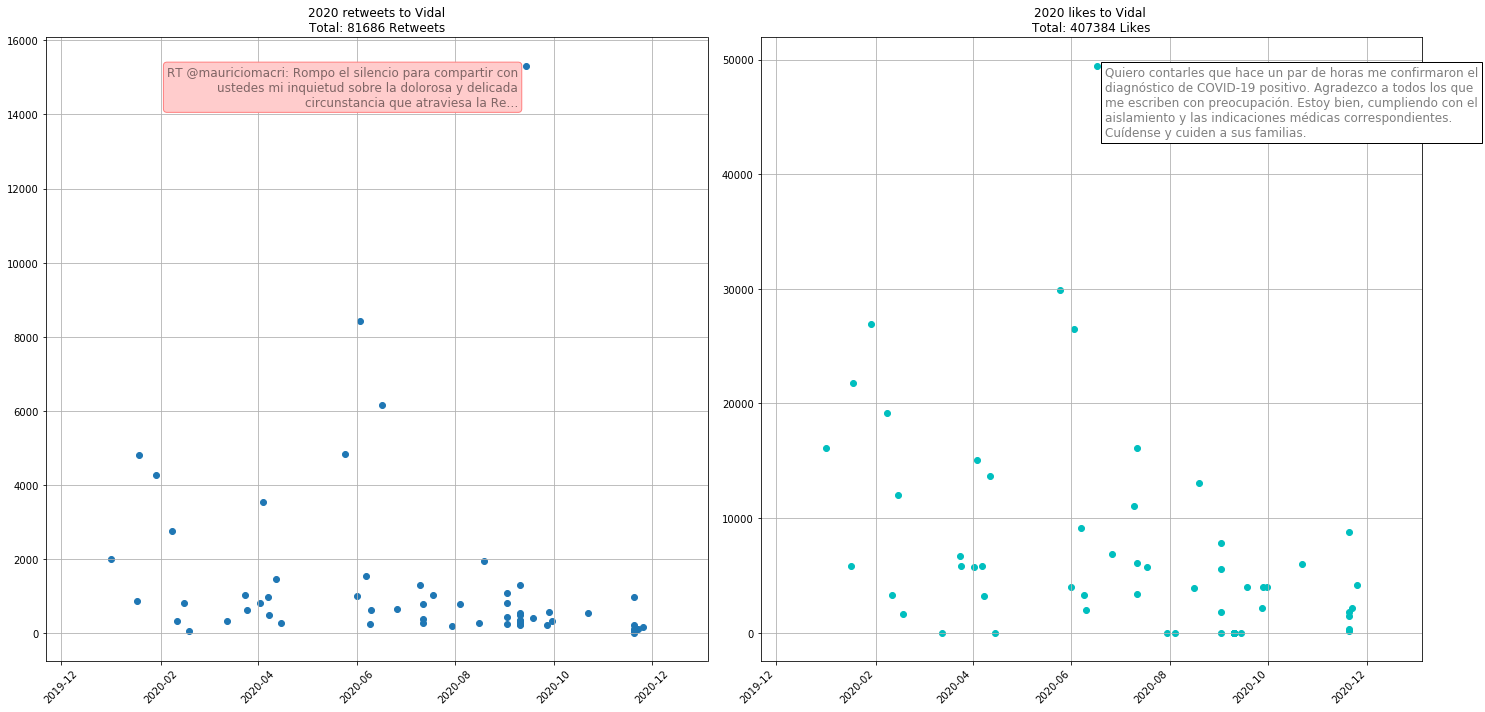

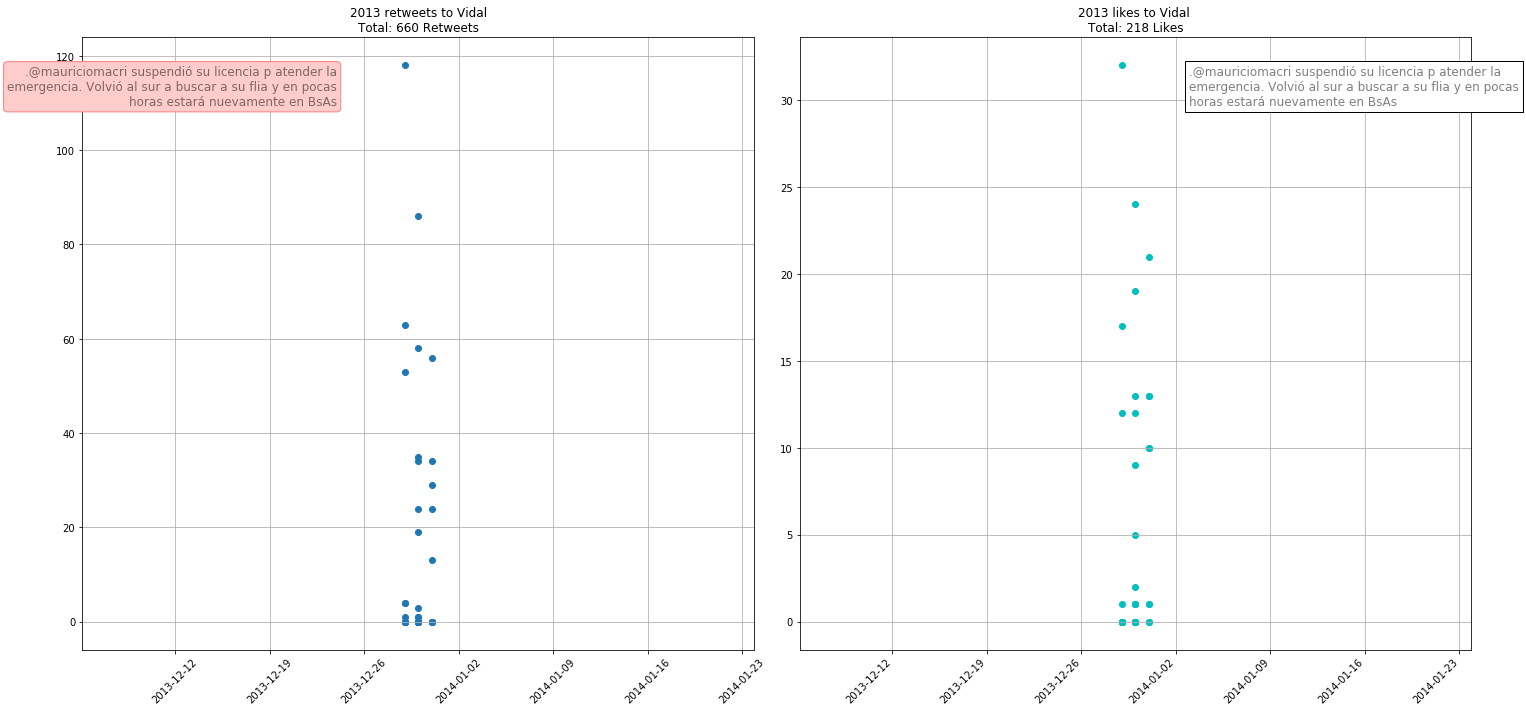

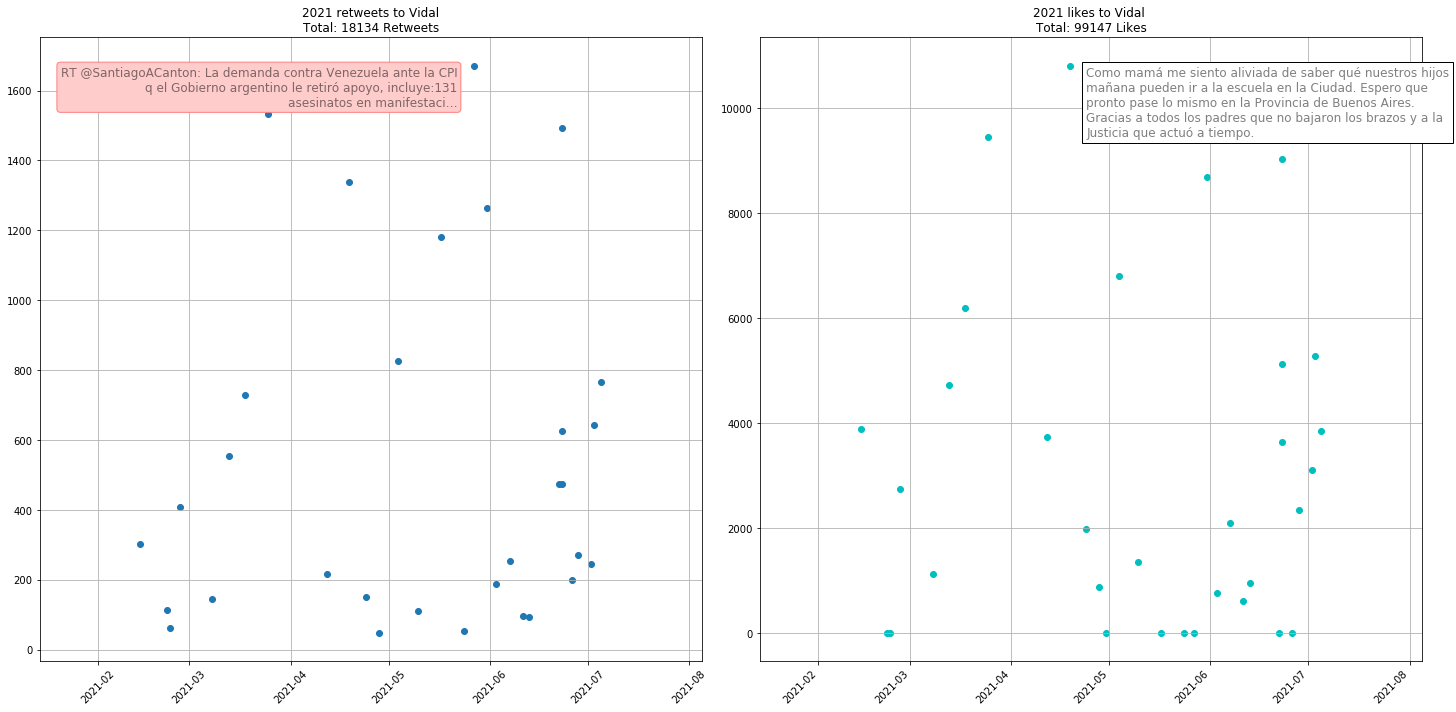

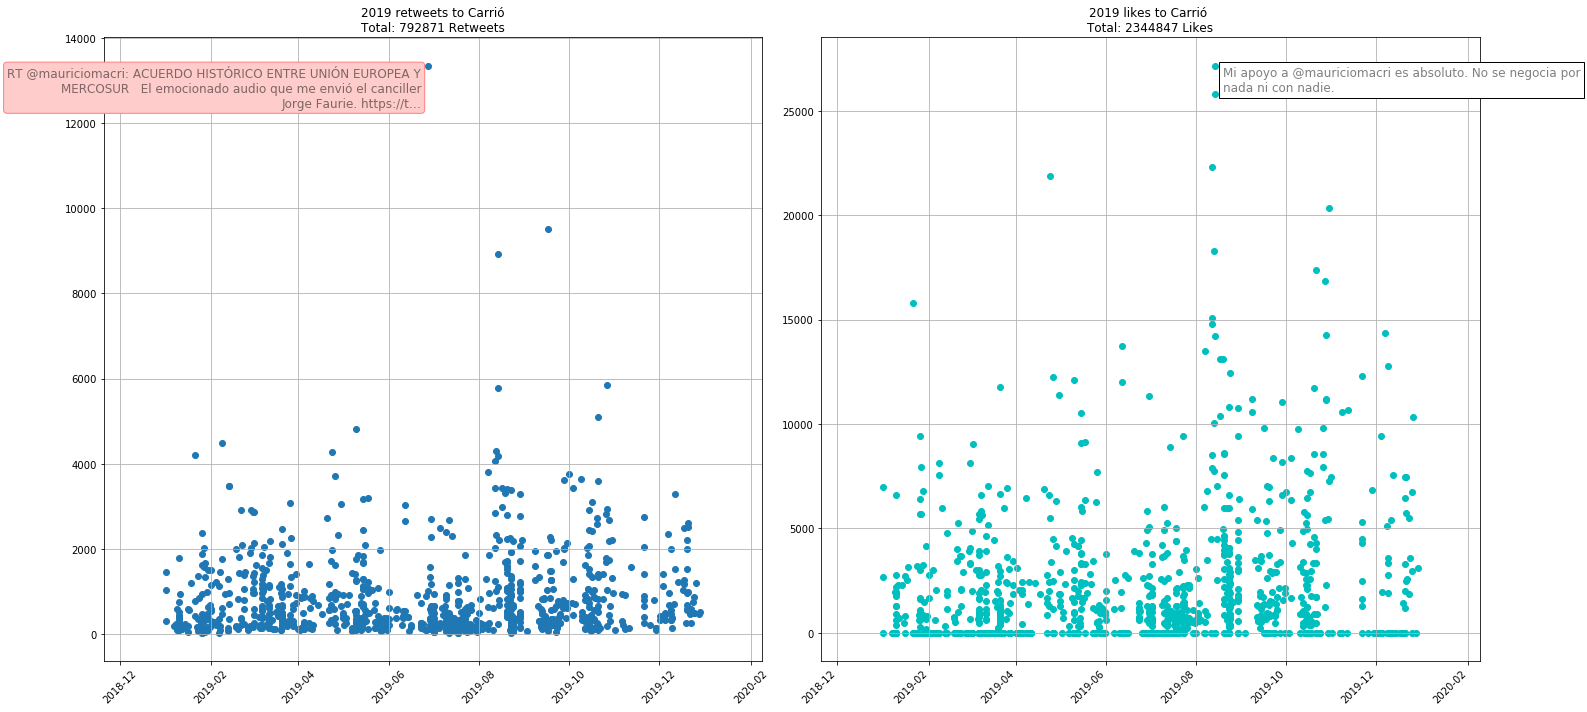

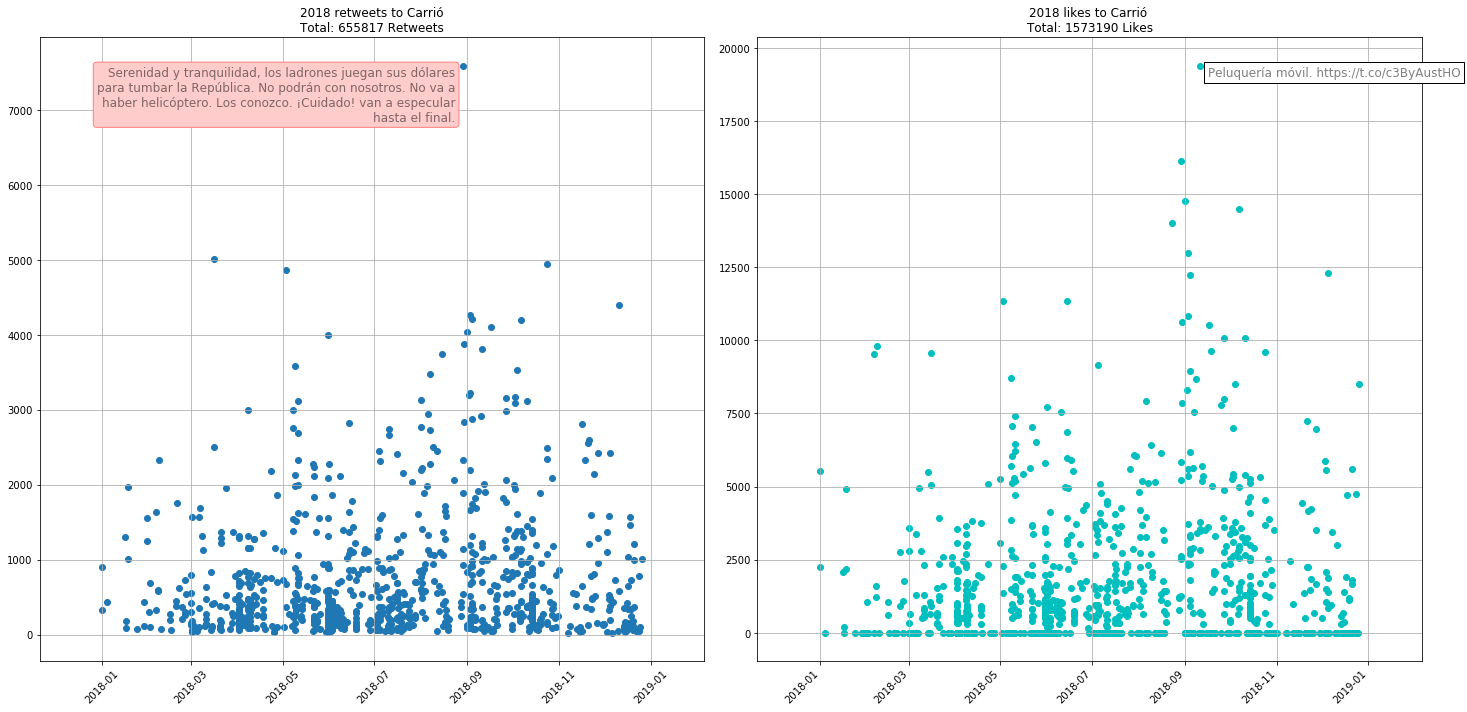

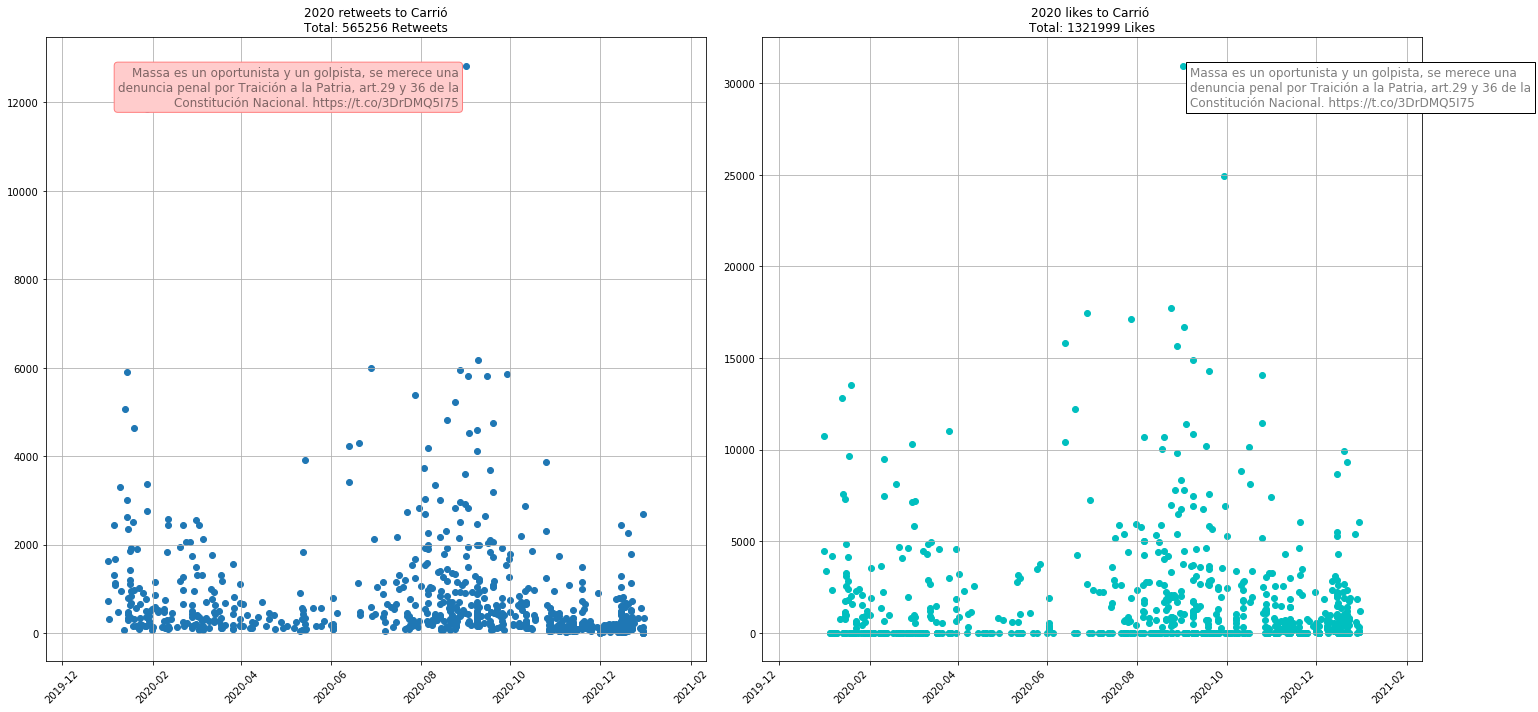

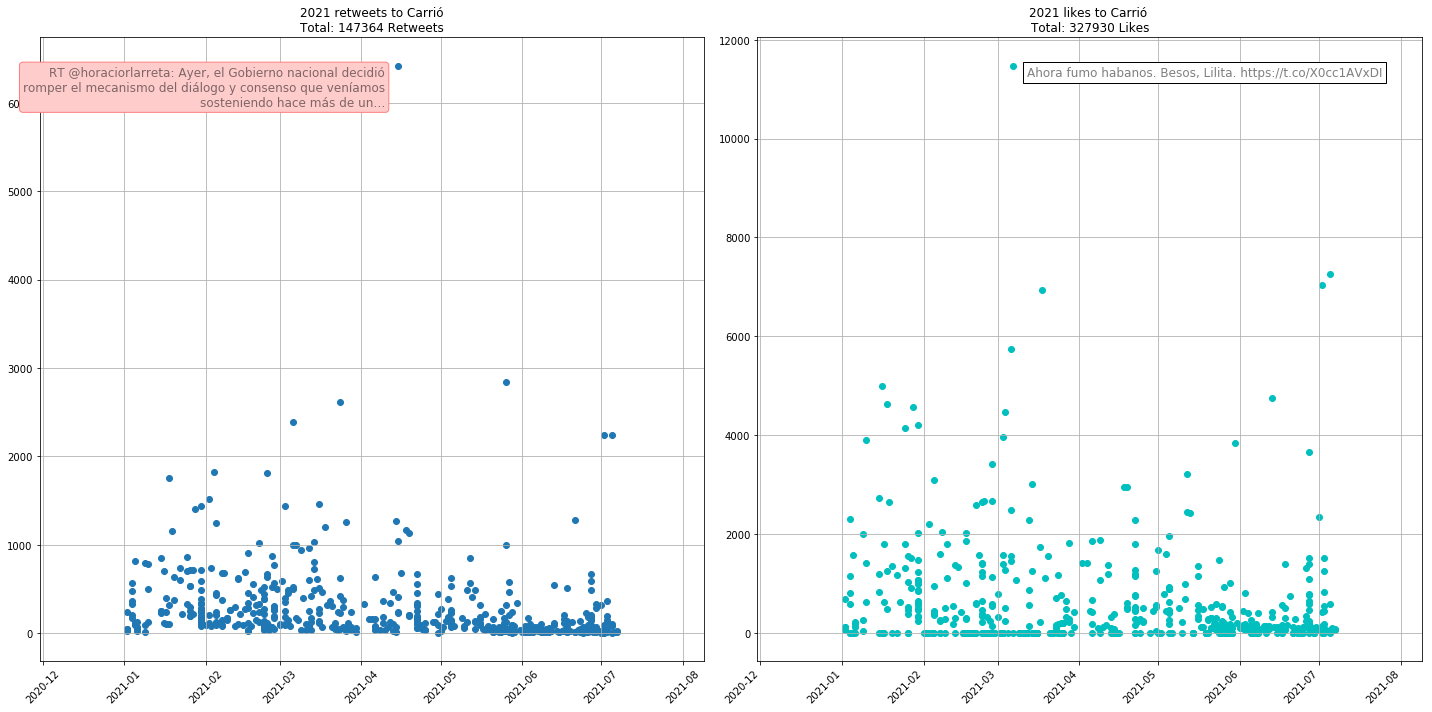

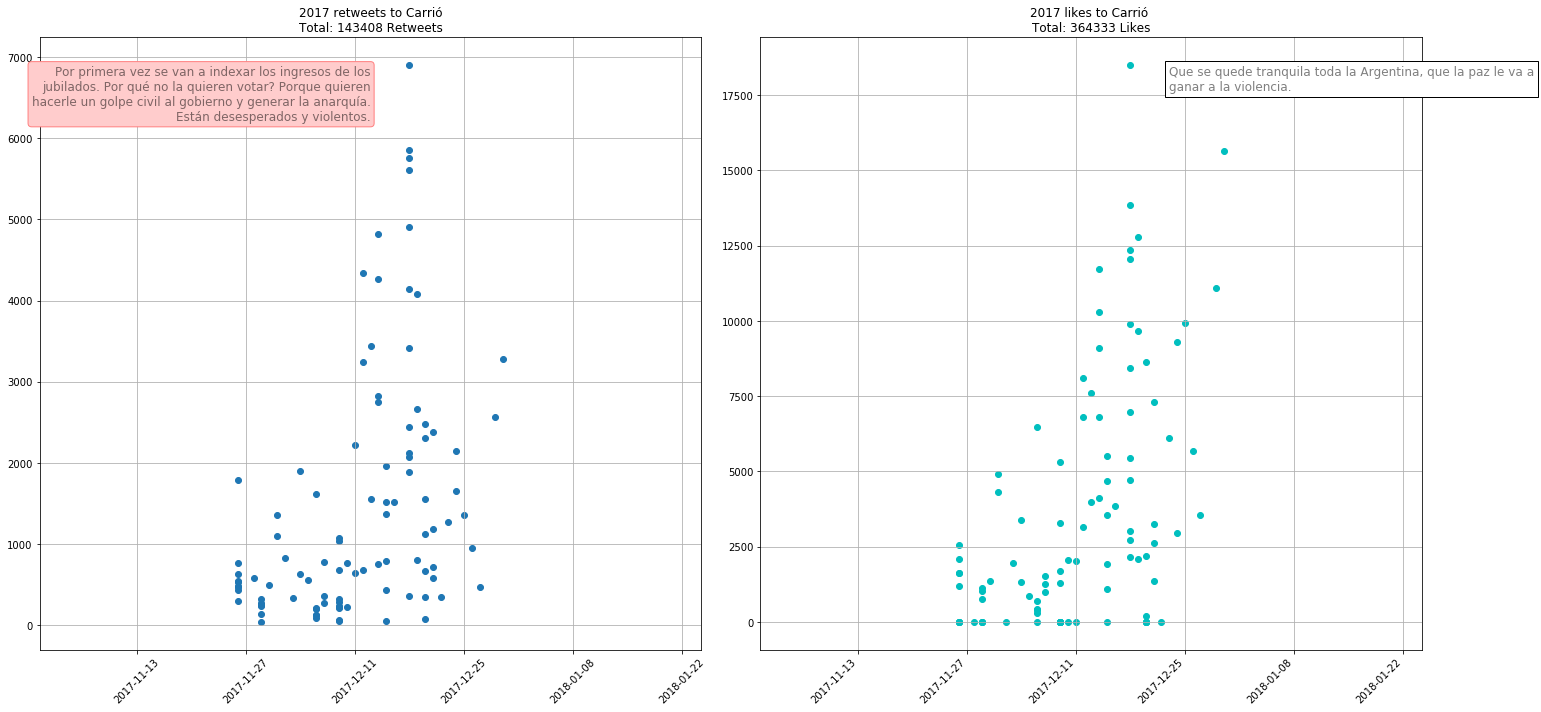

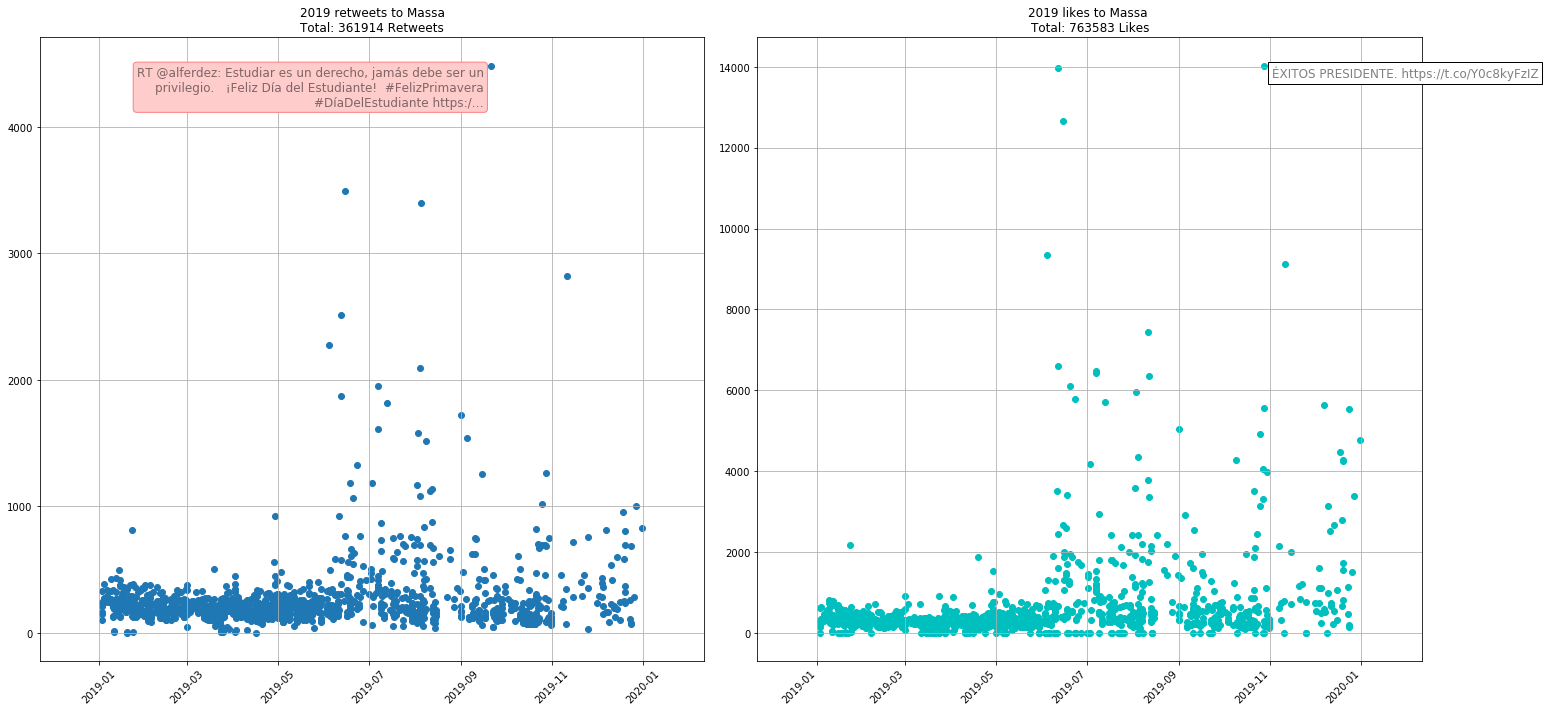

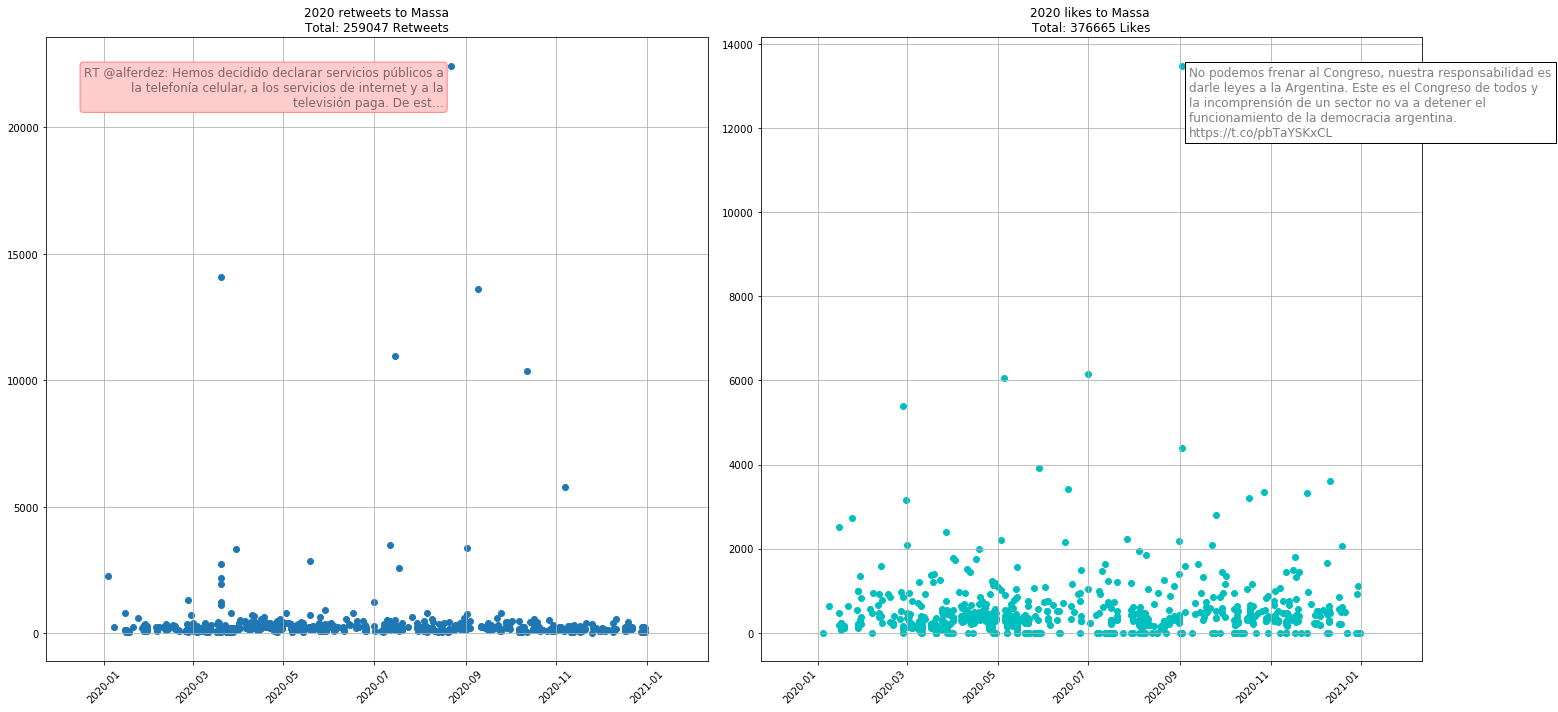

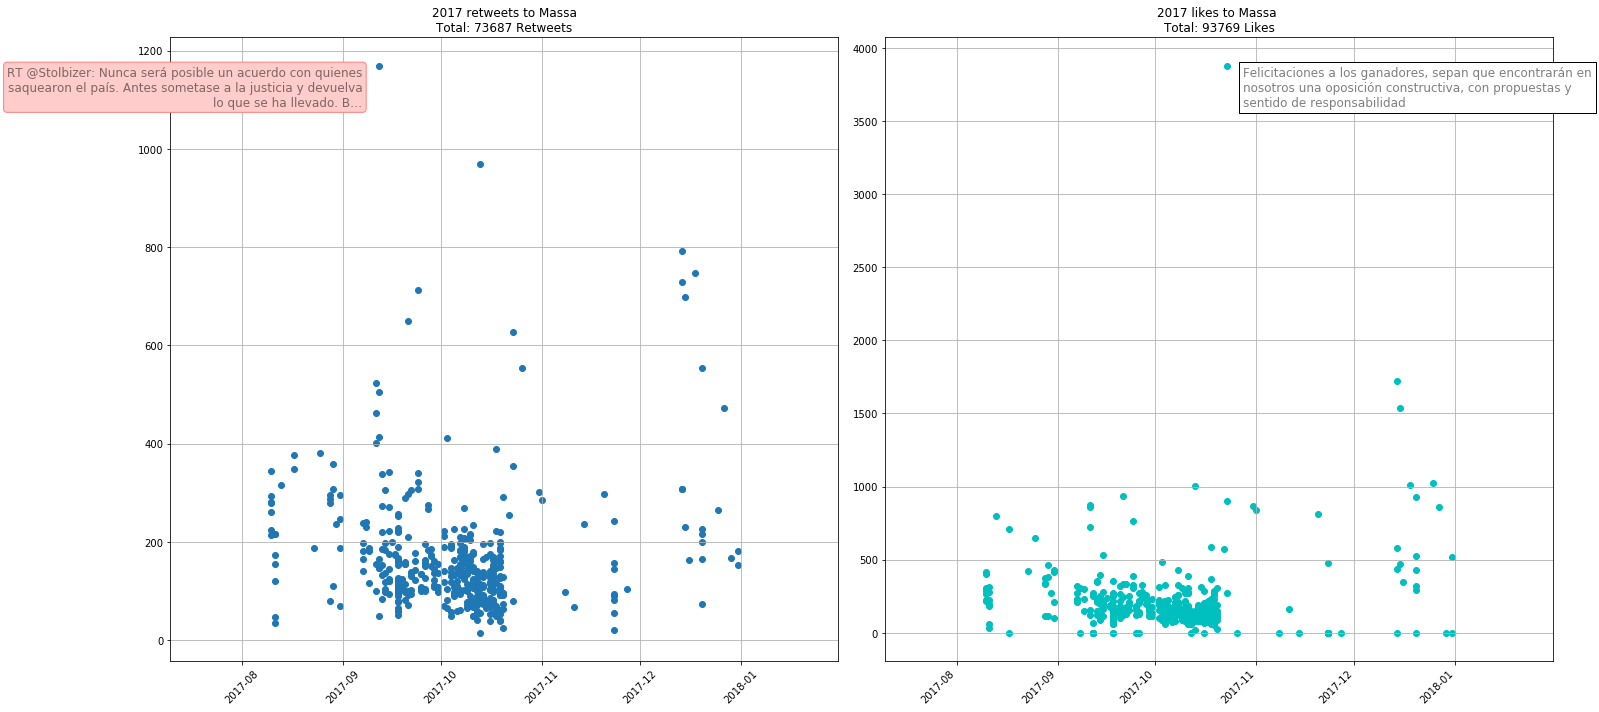

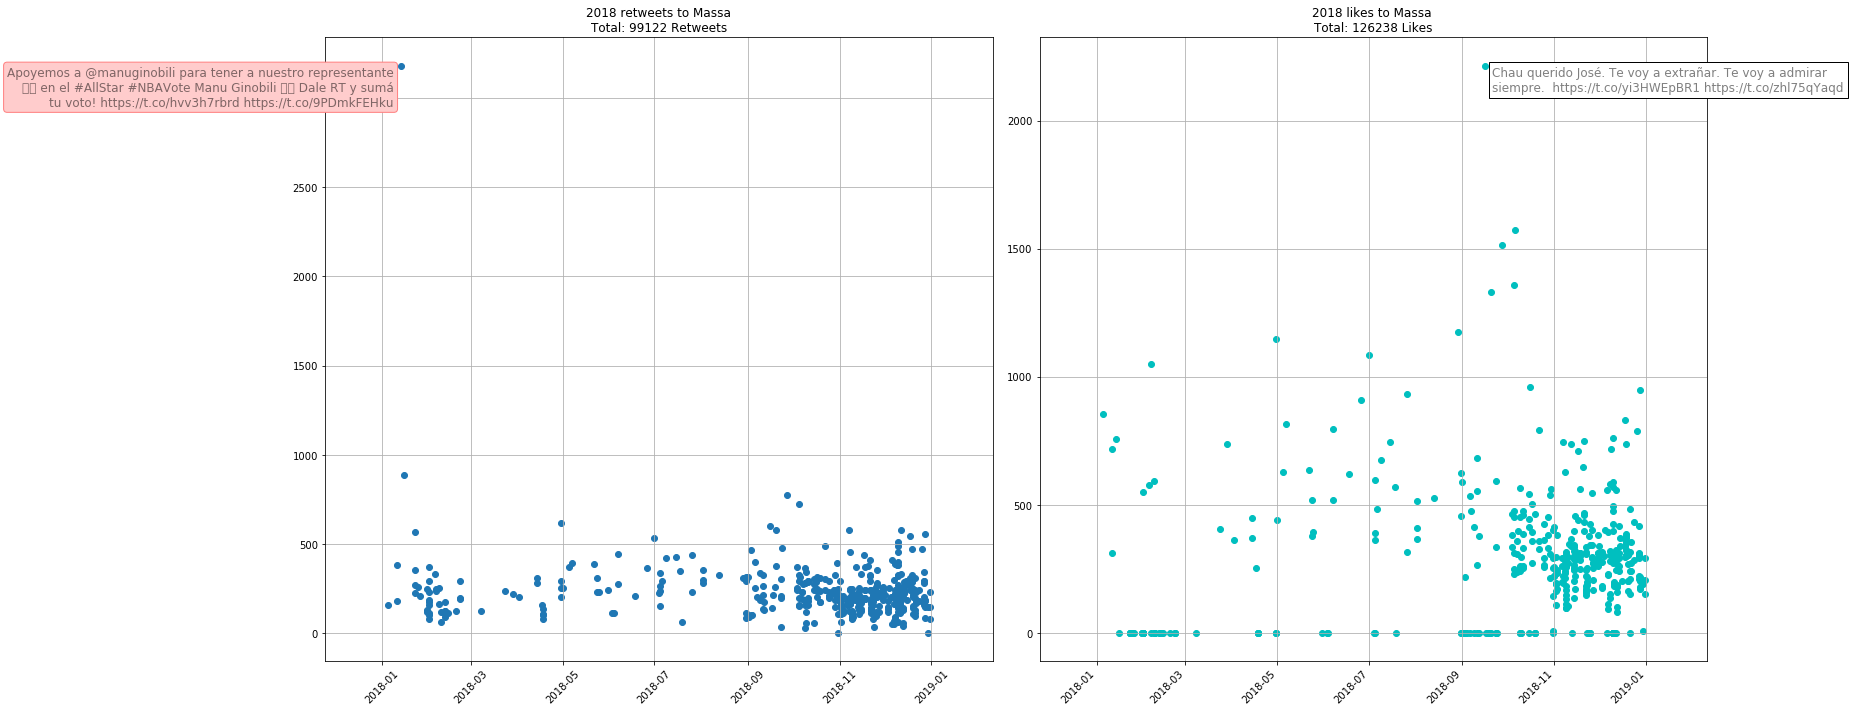

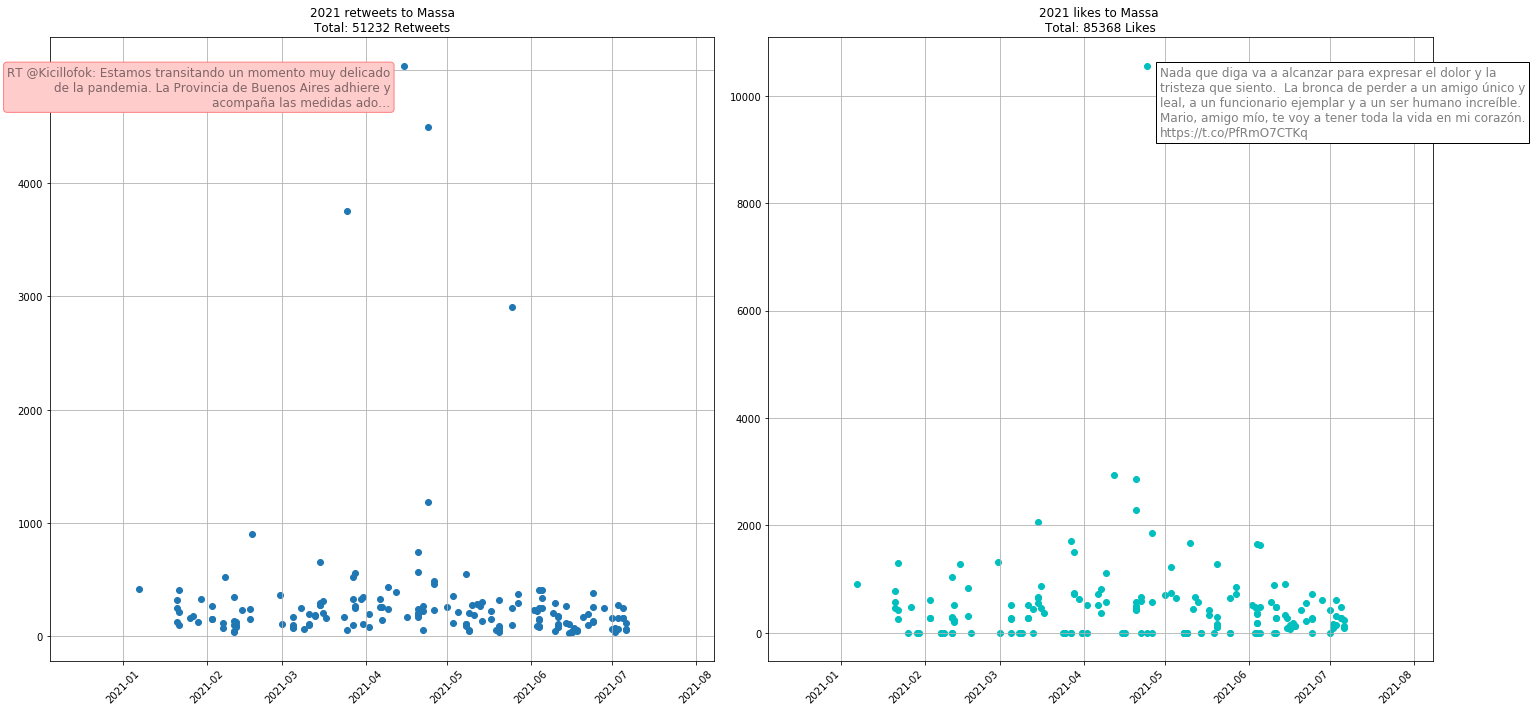

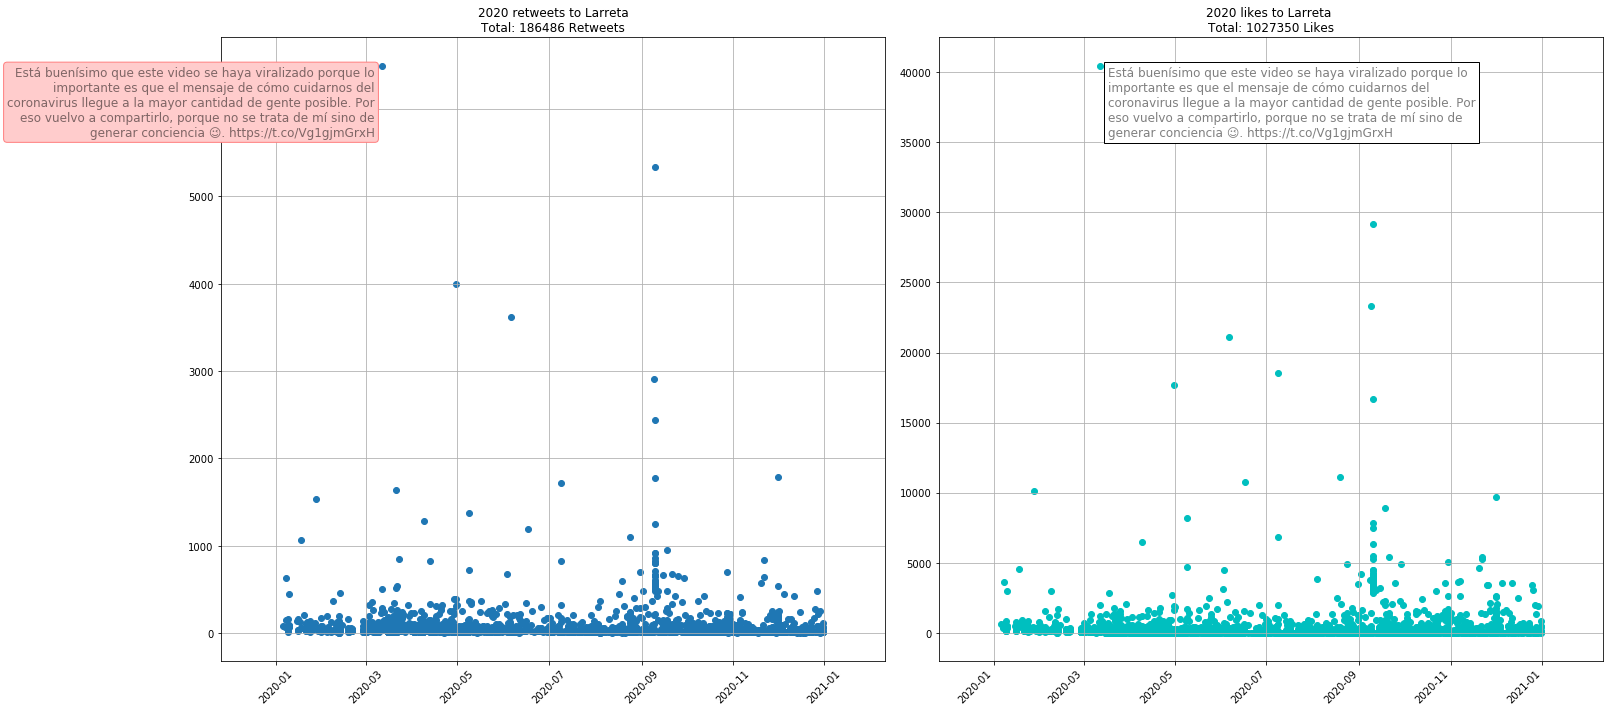

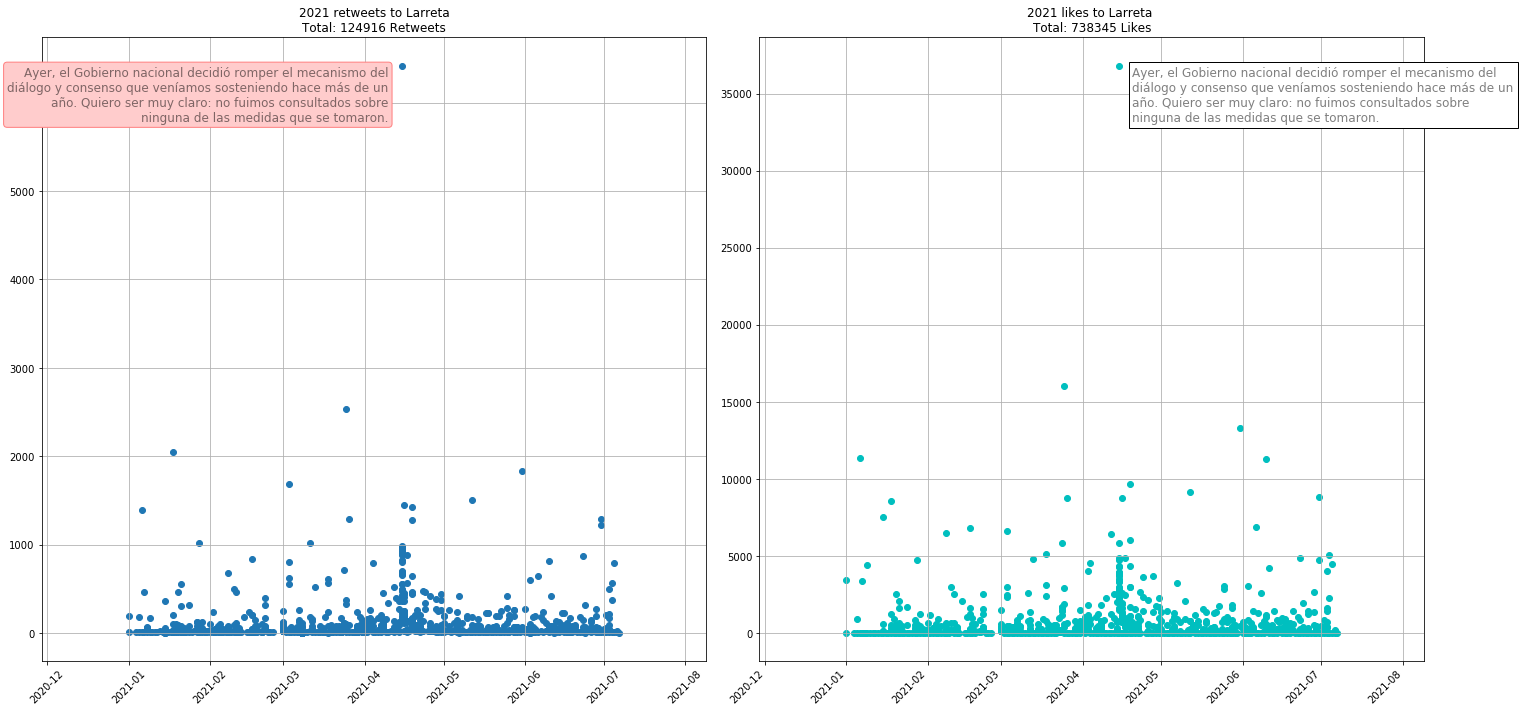

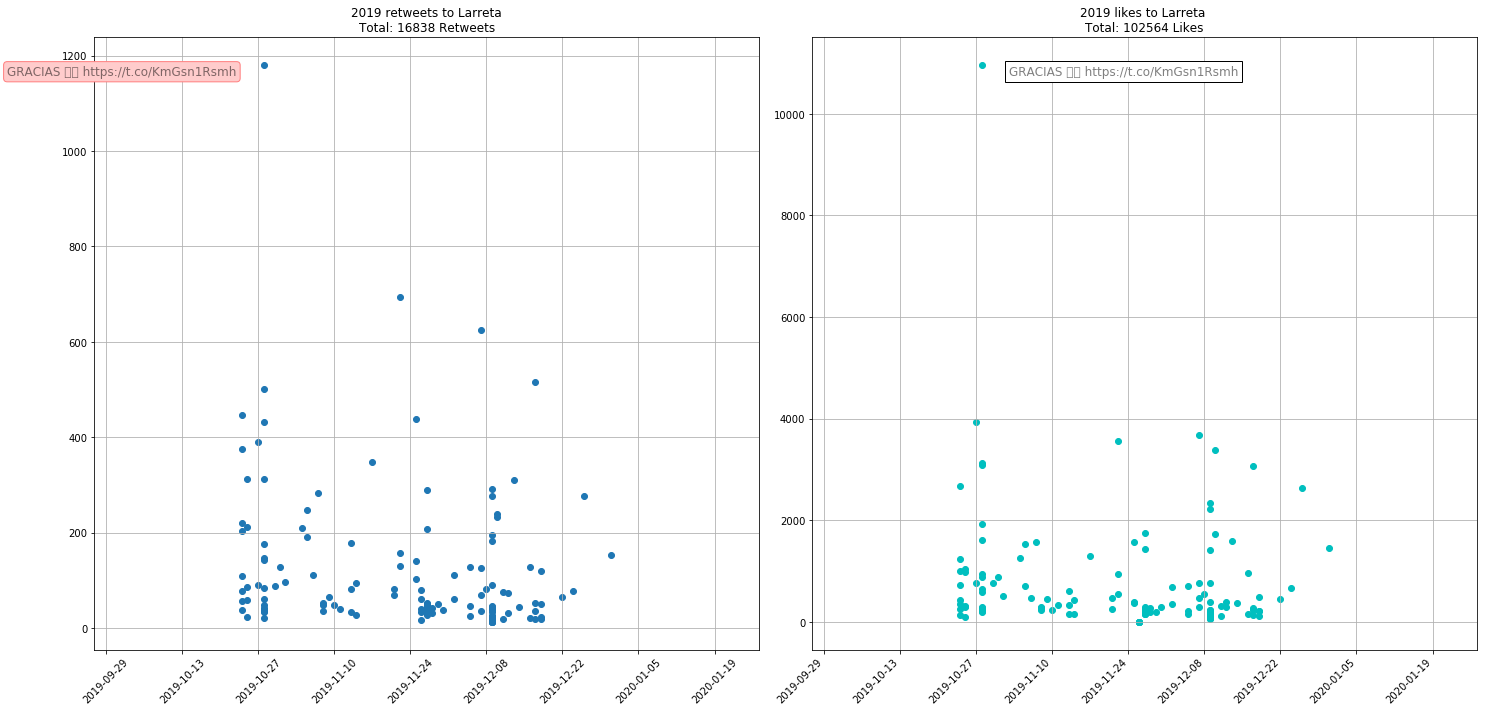

In [190]:
for df, name in zip(data, pol):
    years = pd.to_datetime(df.date).dt.year.sort_values().value_counts().index.values
    for year in years:
        dates = pd.to_datetime(df.loc[df.date.str.contains(str(year)), 'date']).dt.date
        rt = df.loc[df.date.str.contains(str(year))].rts
        lk = df.loc[df.date.str.contains(str(year))].favs
        fig, ax = plt.subplots(1,2,figsize=(20, 10))
        plt.xticks(rotation=45, ha='right')
        # retweets
        ax[0].scatter(dates, rt)
        ax[0].text(dates[rt.sort_values(ascending=False).index[0]] - pd.DateOffset(5), 
                   rt[rt.sort_values(ascending=False).index[0]], 
                   "\n".join(wrap(df.iloc[rt.sort_values(ascending=False).index[0]].tweet[:],60)),
                   ha='right',
                   va='top',
                   fontdict=dict(color='black', alpha=0.5, size=12),
                   bbox=dict(boxstyle="round",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8))
                  )
        ax[0].set_title(f'{year} retweets to {name}\nTotal: {rt.sum()} Retweets')
        ax[0].tick_params(axis='x', labelrotation = 45)
        ax[0].grid(axis='y')
        ax[0].grid(axis='x', linestyle='-')
        # likes
        ax[1].scatter(dates,lk, color='c')
        ax[1].text(dates[lk.sort_values(ascending=False).index[0]] + pd.DateOffset(5), 
                   lk[lk.sort_values(ascending=False).index[0]], 
                   "\n".join(wrap(df.iloc[lk.sort_values(ascending=False).index[0]].tweet[:],60)),
                   ha='left',
                   va='top',
                   fontdict=dict(color='black', alpha=0.5, size=12),
                   bbox=dict(facecolor='white',alpha=1)
                  )
        ax[1].set_title(f'{year} likes to {name} \nTotal: {lk.sum()} Likes')
        ax[1].tick_params(axis='x', labelrotation = 45)
        ax[1].grid(axis='y')
        ax[1].grid(axis='x', linestyle='-')
        fig.tight_layout()
        plt.show()

#### Type of tweets

- thread = reply to him/herself
- reply = reply to someone else

In [206]:
retweets = []
threads = []
quotes = []
replies = []
tweets = []
labels = []

for df in data:
    labels.append(df.user[0])
    retweets.append(df.retweet.sum())
    threads.append(df.thread.sum())
    quotes.append(df.quote.sum())
    replies.append((df.reply != False).sum())
    tweets.append(df.shape[0] - (df.retweet.sum() + df.thread.sum() + df.quote.sum() + (df.reply != False).sum()))

[477, 1671, 2617, 2374, 1852, 1348, 989]


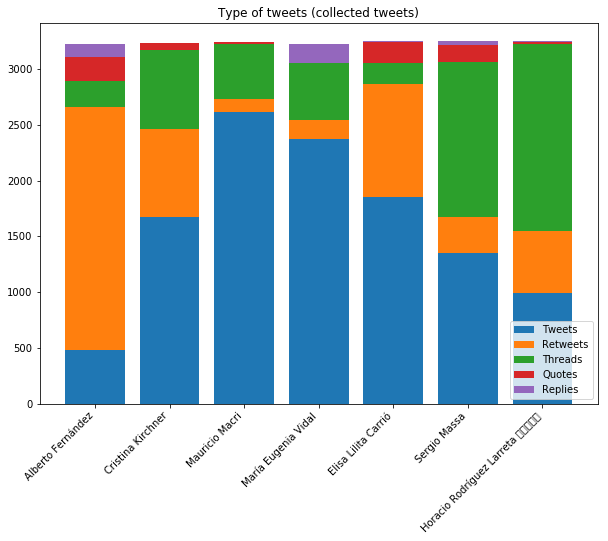

In [189]:
fig, ax = plt.subplots(figsize=(10, 7))

bar3 = np.add(tweets, retweets).tolist()
bar4 = np.add(bar3, threads).tolist()
bar5 = np.add(bar4, quotes).tolist()

ax.bar(labels, tweets, label='Tweets')
ax.bar(labels, retweets, bottom=tweets, label='Retweets')
ax.bar(labels, threads, bottom=bar3, label='Threads')
ax.bar(labels, quotes,  bottom=bar4, label='Quotes')
ax.bar(labels, replies,  bottom=bar5, label='Replies')

ax.set_title('Type of tweets (collected tweets)')
plt.xticks(rotation=45, ha='right')
ax.legend()

plt.show()

In [253]:

for df in data:
    
    years = pd.to_datetime(df.date).dt.year.value_counts().
    """    labels.append(df.user[0])
        
    retweets = []
    threads = []
    quotes = []
    replies = []
    tweets = []
    labels = []
    
    for year in years:

        retweets.append(df.loc[df.date.str.contains(str(year)), 'retweet'].sum())
        threads.append(df.loc[df.date.str.contains(str(year)), 'thread'].sum())
        quotes.append(df.loc[df.date.str.contains(str(year)), 'quote'].sum())
        replies.append((df[df.date.str.contains(str(year))].reply != False).sum())
        tweets.append(
            df.loc[df.date.str.contains(str(year)),:].shape[0] -
            (
                df.loc[df.date.str.contains(str(year)), 'retweet'].sum() +
                df.loc[df.date.str.contains(str(year)), 'thread'].sum() +
                df.loc[df.date.str.contains(str(year)), 'quote'].sum() +
                (df[df.date.str.contains(str(year))].reply != False).sum()
            )
        )
    """
    print(years)


2020    1944
2021    1281
Name: date, dtype: int64
2017    2111
2018     452
2019     364
2020     198
2021     113
Name: date, dtype: int64
2019    975
2017    709
2016    695
2018    693
2021     93
2020     77
Name: date, dtype: int64
2014    898
2015    878
2019    745
2018    287
2017    168
2016    116
2020     59
2013     38
2021     32
Name: date, dtype: int64
2019    986
2018    914
2020    734
2021    515
2017     99
Name: date, dtype: int64
2019    1440
2020     773
2017     444
2018     419
2021     172
Name: date, dtype: int64
2020    2059
2021    1056
2019     135
Name: date, dtype: int64


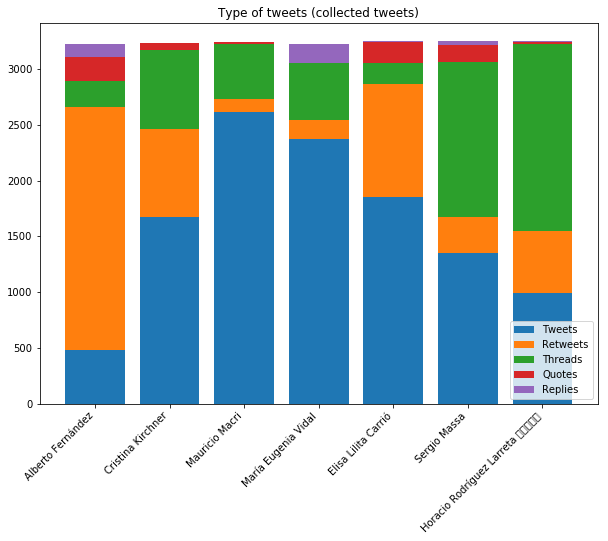

In [189]:
fig, ax = plt.subplots(figsize=(10, 7))

bar3 = np.add(tweets, retweets).tolist()
bar4 = np.add(bar3, threads).tolist()
bar5 = np.add(bar4, quotes).tolist()

ax.bar(labels, tweets, label='Tweets')
ax.bar(labels, retweets, bottom=tweets, label='Retweets')
ax.bar(labels, threads, bottom=bar3, label='Threads')
ax.bar(labels, quotes,  bottom=bar4, label='Quotes')
ax.bar(labels, replies,  bottom=bar5, label='Replies')

ax.set_title('Type of tweets (collected tweets)')
plt.xticks(rotation=45, ha='right')
ax.legend()

plt.show()